# Линейные модели в машинном обучении

## Описание проекта

К нам обратился фермер, который хочет купить бурёнок, чтобы расширить поголовье стада коров.Фермер хочет, чтобы каждая бурёнка давала не менее 6000 килограммов молока в год, а надой был вкусным — строго по его критериям, ничуть не хуже. Он просит у нас обучить модели машинного обучения, которые поможет ему управлять рисками и принимать объективное решение о покупке. 

***Первая*** будет прогнозировать возможный удой у коровы. ***Вторая*** — рассчитывать вероятность получить вкусное молоко от коровы.

***С помощью модели нужно отобрать коров по двум критериям:***
- Средний удой за год — не менее 6000 килограммов,
- Молоко должно быть вкусным.

## Техническое задание

- **Загрузить данные и ознакомиться с ними**
- **Провести предобработку данных**
    - Удалить дубликаты
    - Переиминовать столбцы
    - Удалить выбросы
- **Провести исследовательский анализ данных**
    - Построить графики для каждого признака
    - Сделайте выводы о данных
- **Провести корреляционный анализ данных**
    - Изучить взаимосвязь между всеми признаками
    - Изучить коэффициенты корреляции между всеми признаками
    - Сделать выводы о взаимосвязи признаков
- **Решить задачу линейной регрессии**
    - Обучить три модели с разными параметрами
    - Сравнить полученные модели и выбрать лучшую
    - Изучит доверительный интервал лучшей модели
    - Спрогнозировать удой коров которых хочет купить фермер
- **Решить задачу классификации**
    - Обучить модель линейной регрессии
    - Определить самую важную для нас метрику
    - Подобрать такое значение порога принадлежности класса при котором важная для нас ошибка будет равна нулю
    - Предсказать значения вкуса молока на настроенной модели
- **Написать общий вывод**
    - Отобрать коров удой которых больше 6000 кг в год и которые дают вкусное молоко по мнению модели
    - Описать результаты работы моделей для фермера, дать рекомендации
    - Сделать выводы о моделях линейной и логистической регрессий 

## Загрузка и знакомство с данными

Нобходимо импортировать все необходимые для проекта библиотеки.

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import ydata_profiling
from scipy.stats import spearmanr
from scipy.stats import kendalltau
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

In [2]:
try:
    ferma_main_df = pd.read_csv('datasets/ferma_main.csv', sep=';')
except:
    ferma_main_df = pd.read_csv('/datasets/ferma_main.csv', sep=';')
    
ferma_main_df.head()

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,"14,2",1743,"0,89",Вис Бик Айдиал,Равнинное,Айдиал,"3,58","3,076",вкусно,более_2_лет
1,2,5529,"12,8",2138,"0,89",Вис Бик Айдиал,Равнинные,Соверин,"3,54","3,079",вкусно,менее_2_лет
2,3,5810,14,1854,"0,885",РефлешнСоверинг,Холмистое,Соверин,"3,59","3,074",не вкусно,более_2_лет
3,4,5895,"12,4",2012,"0,885",РефлешнСоверинг,Холмистое,Айдиал,"3,4","3,075",не вкусно,более_2_лет
4,5,5302,"12,8",1675,"0,885",Вис Бик Айдиал,Равнинные,Соверин,"3,73","3,073",вкусно,менее_2_лет


In [3]:
ferma_main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   id                                     634 non-null    int64 
 1   Удой, кг                               634 non-null    int64 
 2   ЭКЕ (Энергетическая кормовая единица)  634 non-null    object
 3   Сырой протеин, г                       634 non-null    int64 
 4   СПО (Сахаро-протеиновое соотношение)   634 non-null    object
 5   Порода                                 634 non-null    object
 6   Тип пастбища                           634 non-null    object
 7   порода папы_быка                       634 non-null    object
 8   Жирность,%                             634 non-null    object
 9   Белок,%                                634 non-null    object
 10  Вкус молока                            634 non-null    object
 11  Возраст            

Пропусков в этом датафрейме нет, нужно будет проверить его на наличае дубликатов и выбросов. Так же нужно будет приветси название столбцов к более привычному виду. Еще необходимо изучить и изменить типы данных.

In [4]:
try:
    ferma_dad_df = pd.read_csv('datasets/ferma_dad.csv', sep=';')
except:
    ferma_dad_df = pd.read_csv('/datasets/ferma_dad.csv', sep=';')
ferma_dad_df.head()

,id,Имя Папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


In [5]:
ferma_dad_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   Имя Папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


В этом датафрейме ситуация такая же как и в **ferma_main_df**.

In [6]:
try:
    cow_buy_df = pd.read_csv('datasets/cow_buy.csv', sep=';')
except:
    cow_buy_df = pd.read_csv('/datasets/cow_buy.csv', sep=';')

cow_buy_df.head()

,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,"3,58","3,076",более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,"3,54","3,081",менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,"3,59","3,074",более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,"3,4","3,061",более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,"3,64","3,074",более_2_лет


In [7]:
cow_buy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Порода                   20 non-null     object
 1   Тип пастбища             20 non-null     object
 2   порода папы_быка         20 non-null     object
 3   Имя_папы                 20 non-null     object
 4   Текущая_жирность,%       20 non-null     object
 5   Текущий_уровень_белок,%  20 non-null     object
 6   Возраст                  20 non-null     object
dtypes: object(7)
memory usage: 1.2+ KB


Пропусков в датафрейме не обнаружено, необходимо привести название столбцов к привычному виду и изучить датафрейм на наличе пропусков и выбросов.

### Вывод по первому знакомству с данными

На первый взгляд данные кажутся достаточно качественными. Пропусков в них нет. Возможно проблемы вскроются на этапе предобработки данных. Можно переходить к ней.

### Предобработка данных

На этом этапе рассмотрим каждый датафрейм по отдельности и псмотрим на значение в его столбцах внимательнее. Но для начала нужно сохранить размеры датафреймов до предобработки данных, чтобы потом понять какой процент данных мы потеряли на этапе предобработки.

In [8]:
ferma_main_df_shape_before_treatments = ferma_main_df.shape[0]
ferma_dad_df_shape_before_treatments = ferma_dad_df.shape[0]
cow_buy_df_shape_before_treatments = cow_buy_df.shape[0]
ferma_main_df_shape_before_treatments, ferma_dad_df_shape_before_treatments, cow_buy_df_shape_before_treatments

(634, 629, 20)

Теперь можно переходить к предобработке по датафреймам.

### Предобработка ferma_main_df

In [9]:
ferma_main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   id                                     634 non-null    int64 
 1   Удой, кг                               634 non-null    int64 
 2   ЭКЕ (Энергетическая кормовая единица)  634 non-null    object
 3   Сырой протеин, г                       634 non-null    int64 
 4   СПО (Сахаро-протеиновое соотношение)   634 non-null    object
 5   Порода                                 634 non-null    object
 6   Тип пастбища                           634 non-null    object
 7   порода папы_быка                       634 non-null    object
 8   Жирность,%                             634 non-null    object
 9   Белок,%                                634 non-null    object
 10  Вкус молока                            634 non-null    object
 11  Возраст            

Необходимо привести название столбцов к общему (удобному) виду.

In [10]:
ferma_main_df.rename(
    columns={
        'Удой, кг' : 'удой_кг',
        'ЭКЕ (Энергетическая кормовая единица)' : 'энергетическая_кормовая_единица',
        'Сырой протеин, г' : 'сырой_протеин_г',
        'СПО (Сахаро-протеиновое соотношение)' : 'cахаро_протеиновое_соотношение',
        'Порода' : 'порода',
        'Тип пастбища' : 'тип_пастбища',
        'порода папы_быка' : 'порода_папы_быка',
        'Жирность,%' : 'жирность_%',
        'Белок,%' : 'белок_%',
        'Вкус молока' : 'вкус_молока',
        'Возраст' : 'возраст'
    },
    inplace=True
)
ferma_main_df.columns

Index(['id', 'удой_кг', 'энергетическая_кормовая_единица', 'сырой_протеин_г',
       'cахаро_протеиновое_соотношение', 'порода', 'тип_пастбища',
       'порода_папы_быка', 'жирность_%', 'белок_%', 'вкус_молока', 'возраст'],
      dtype='object')

Названия столбцов изменены, теперь они более менее одинаковы. Теперь нунжно изменить тип данных в столбцах. Посмотри какие данные в каком столбце лежат.

In [11]:
ferma_main_df.head()

,id,удой_кг,энергетическая_кормовая_единица,сырой_протеин_г,cахаро_протеиновое_соотношение,порода,тип_пастбища,порода_папы_быка,жирность_%,белок_%,вкус_молока,возраст
0,1,5863,"14,2",1743,"0,89",Вис Бик Айдиал,Равнинное,Айдиал,"3,58","3,076",вкусно,более_2_лет
1,2,5529,"12,8",2138,"0,89",Вис Бик Айдиал,Равнинные,Соверин,"3,54","3,079",вкусно,менее_2_лет
2,3,5810,14,1854,"0,885",РефлешнСоверинг,Холмистое,Соверин,"3,59","3,074",не вкусно,более_2_лет
3,4,5895,"12,4",2012,"0,885",РефлешнСоверинг,Холмистое,Айдиал,"3,4","3,075",не вкусно,более_2_лет
4,5,5302,"12,8",1675,"0,885",Вис Бик Айдиал,Равнинные,Соверин,"3,73","3,073",вкусно,менее_2_лет


In [12]:
ferma_main_df.dtypes

id                                  int64
удой_кг                             int64
энергетическая_кормовая_единица    object
сырой_протеин_г                     int64
cахаро_протеиновое_соотношение     object
порода                             object
тип_пастбища                       object
порода_папы_быка                   object
жирность_%                         object
белок_%                            object
вкус_молока                        object
возраст                            object
dtype: object

Можно заметить, что в столбцах где должны быть значния типа **float** значения типа **object**, потому что в них всместо принятого формата **целая_часть.дробная_часть** записано **целая_часть,дробная_часть** - скорее всего это вызвано ошибкой при заполнении таблицы.

In [13]:
# Переведем нужные столбцы к типу int16/int32 для экономии места и удобства вычислений
for name in ['id', 'удой_кг', 'сырой_протеин_г']:
    ferma_main_df[name] = pd.to_numeric(
        ferma_main_df[name],
        downcast='integer'
    )

    
#Переведем нужные столбцы к типу float32 для экономии места и удобства вычислений
for name in ['энергетическая_кормовая_единица', 'cахаро_протеиновое_соотношение', 'жирность_%', 'белок_%']:
    ferma_main_df[name] = pd.to_numeric(
        ferma_main_df[name].str.replace(',', '.'),
        downcast='float'
    )

ferma_main_df.dtypes

id                                   int16
удой_кг                              int32
энергетическая_кормовая_единица    float32
сырой_протеин_г                      int16
cахаро_протеиновое_соотношение     float32
порода                              object
тип_пастбища                        object
порода_папы_быка                    object
жирность_%                         float32
белок_%                            float32
вкус_молока                         object
возраст                             object
dtype: object

Теперь необходимо привести все значения типа **object** к нижнему регистру и проверить датафрейм на наличие дубликатов.

In [14]:
for name in ['порода', 'тип_пастбища', 'порода_папы_быка', 'вкус_молока', 'возраст']:
    ferma_main_df[name] = ferma_main_df[name].str.lower()
    display(ferma_main_df[name].unique())

array(['вис бик айдиал', 'рефлешнсоверинг'], dtype=object)

array(['равнинное', 'равнинные', 'холмистое'], dtype=object)

array(['айдиал', 'соверин', 'айдиалл'], dtype=object)

array(['вкусно', 'не вкусно'], dtype=object)

array(['более_2_лет', 'менее_2_лет'], dtype=object)

In [15]:
ferma_main_df['тип_пастбища'] = (ferma_main_df['тип_пастбища']
                                 .str
                                 .replace('равнинные', 'равнинное')
                                )
ferma_main_df['порода_папы_быка'] = (ferma_main_df['порода_папы_быка']
                                     .str
                                     .replace('айдиалл', 'айдиал')
                                    )

In [16]:
for name in ['порода', 'тип_пастбища', 'порода_папы_быка', 'вкус_молока', 'возраст']:
    ferma_main_df[name] = ferma_main_df[name].str.lower()
    display(ferma_main_df[name].unique())

array(['вис бик айдиал', 'рефлешнсоверинг'], dtype=object)

array(['равнинное', 'холмистое'], dtype=object)

array(['айдиал', 'соверин'], dtype=object)

array(['вкусно', 'не вкусно'], dtype=object)

array(['более_2_лет', 'менее_2_лет'], dtype=object)

Мы нашли два неявных дубликата и избавились от них. Время посмотреть сколько полных дубликатов в этом датафрейме

In [17]:
print('Количиство явных дубликатов:', ferma_main_df.duplicated().sum())

Количиство явных дубликатов: 5


In [18]:
ferma_main_df.drop_duplicates(inplace=True)
print('Количиство явных дубликатов:', ferma_main_df.duplicated().sum())

Количиство явных дубликатов: 0


Мы нашли 5 полных дубликатов в данных и избавились от них. Теперь нужно посмотреть нет ли в данных аномальных значений.

In [19]:
ferma_main_df.describe()

,id,удой_кг,энергетическая_кормовая_единица,сырой_протеин_г,cахаро_протеиновое_соотношение,жирность_%,белок_%
count,629.00000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000
mean,315.00000,6188.750397,14.543879,1923.364070,0.913116,3.603657,3.075671
std,181.72094,1644.795489,1.306408,182.956251,0.032203,0.168656,0.002549
min,1.00000,5204.000000,10.900000,1660.000000,0.840000,2.990000,3.069000
25%,158.00000,5751.000000,13.500000,1771.000000,0.890000,3.590000,3.074000
50%,315.00000,6133.000000,14.700000,1888.000000,0.930000,3.650000,3.076000
75%,472.00000,6501.000000,15.600000,2062.000000,0.940000,3.720000,3.077000
max,629.00000,45616.000000,16.799999,2349.000000,0.960000,3.750000,3.085000


Из всего смущает только корова которая несет **45616** литров молока в год.

In [20]:
ferma_main_df['удой_кг'].sort_values(ascending=False).head()

16     45616
70      7222
135     7207
296     7201
294     7197
Name: удой_кг, dtype: int32

In [21]:
ferma_main_df[ferma_main_df['удой_кг'] == 45616]

,id,удой_кг,энергетическая_кормовая_единица,сырой_протеин_г,cахаро_протеиновое_соотношение,порода,тип_пастбища,порода_папы_быка,жирность_%,белок_%,вкус_молока,возраст
16,17,45616,11.5,1675,0.93,вис бик айдиал,холмистое,айдиал,3.22,3.076,вкусно,более_2_лет


Конечно это значение выглядит максимально нереалестично относительно других, но по информации из интернета, действительно существуют коровы, которые могут давать такой удой. Поэтому пока что это значение удалять не будет - удалим его, если оно будет мешать обучить нам нашу модель. Тем более учитывая, что одно это значение не сильно "утянуло" среднее значение от медианы.

In [22]:
1 - ferma_main_df.shape[0] /  ferma_main_df_shape_before_treatments 

0.007886435331230235

Мы закончили предобработку даннх в этом датафрейме. На этом этапе мы потеряли меньше одного процента данных - это отличный результат.

### Предобработка ferma_dad_df

Этот датафрейм хранит имя папы каждой коровы в стаде фермера.

In [23]:
ferma_dad_df.head()

,id,Имя Папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


In [24]:
ferma_dad_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   Имя Папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


В этом датафрейме нет пропущенных значений и число строк совпадает с числом строк в датафрейме **ferma_main_df** - это дает надежду, что для каждой коровы найдется папа. Нам нужно привести название столбца "Имя Папы" к общему виду. Так же необходимо проверить датафрейм на наличая дубликатов.

In [25]:
ferma_dad_df.rename(
    columns={
        'Имя Папы' : 'имя_папы'
    },
    inplace=True
)
ferma_dad_df.columns

Index(['id', 'имя_папы'], dtype='object')

In [26]:
ferma_dad_df['имя_папы'].unique()

array(['Буйный', 'Соловчик', 'Барин', 'Геркулес'], dtype=object)

Для своего удобства приведу все значения столбца **имя_папы** к нижнему регистру.

In [27]:
ferma_dad_df['имя_папы'] = ferma_dad_df['имя_папы'].str.lower()

In [28]:
print('Количиство явных дубликатов:', ferma_dad_df.duplicated().sum())

Количиство явных дубликатов: 0


С предобработкой данного датафрейма окончено. Мы не удалили ни одного значения, следовательно нам нет необходимости проверять какой процент данных мы потеряли (он равен нулю).

### Предобработка cow_buy_df

В данном датафрейме хранятся данные о коровах «ЭкоФермы», которых фермер хочет изучить перед покупкой. Структура таблицы почти аналогична **ferma_main_df**, кроме нескольких особенностей:
- Белок и Жирность молока указаны на момент покупки — когда «ЭкоФерма» давала им свой корм.
- Параметры кормления ЭКЕ, Сырой протеин, СПО отсутствуют.

In [29]:
cow_buy_df.head()

,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,"3,58","3,076",более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,"3,54","3,081",менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,"3,59","3,074",более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,"3,4","3,061",более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,"3,64","3,074",более_2_лет


In [30]:
cow_buy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Порода                   20 non-null     object
 1   Тип пастбища             20 non-null     object
 2   порода папы_быка         20 non-null     object
 3   Имя_папы                 20 non-null     object
 4   Текущая_жирность,%       20 non-null     object
 5   Текущий_уровень_белок,%  20 non-null     object
 6   Возраст                  20 non-null     object
dtypes: object(7)
memory usage: 1.2+ KB


Нужно привести название столбцов к привычному виду. Проверить данные на дубликаты и отрдактировать типы данных.

In [31]:
cow_buy_df.rename(
    columns={
        'Порода' : 'порода',
        'Тип пастбища' : 'тип_пастбища',
        'порода папы_быка' : 'порода_папы_быка',
        'Имя_папы' : 'имя_папы',
        'Текущая_жирность,%' : 'текущая_жирность_%',
        'Текущий_уровень_белок,%' : 'текущий_уровень_белок_%',
        'Возраст' : 'возраст'
    },
    inplace=True
)
cow_buy_df.columns

Index(['порода', 'тип_пастбища', 'порода_папы_быка', 'имя_папы',
       'текущая_жирность_%', 'текущий_уровень_белок_%', 'возраст'],
      dtype='object')

In [32]:
# Приведем все строковые данные к нижнему регистру
for name in ['порода', 'тип_пастбища', 'порода_папы_быка', 'имя_папы', 'возраст']:
    cow_buy_df[name] = (cow_buy_df[name]
                        .str
                        .lower()
                       )
    display(cow_buy_df[name].unique())

# Приведем все данные с плавающей точкой к типу float    
for name in ['текущая_жирность_%', 'текущий_уровень_белок_%']:
    cow_buy_df[name] = (pd.
                        to_numeric(
                            cow_buy_df[name].str.replace(',', '.'),
                            downcast='float'
                            )
                       )
cow_buy_df.head()

array(['вис бик айдиал', 'рефлешнсоверинг'], dtype=object)

array(['холмистое', 'равнинное'], dtype=object)

array(['айдиал', 'соверин'], dtype=object)

array(['геркулес', 'буйный', 'барин', 'соловчик'], dtype=object)

array(['более_2_лет', 'менее_2_лет'], dtype=object)

,порода,тип_пастбища,порода_папы_быка,имя_папы,текущая_жирность_%,текущий_уровень_белок_%,возраст
0,вис бик айдиал,холмистое,айдиал,геркулес,3.58,3.076,более_2_лет
1,вис бик айдиал,равнинное,соверин,буйный,3.54,3.081,менее_2_лет
2,рефлешнсоверинг,равнинное,соверин,барин,3.59,3.074,более_2_лет
3,рефлешнсоверинг,холмистое,айдиал,буйный,3.40,3.061,более_2_лет
4,рефлешнсоверинг,равнинное,айдиал,буйный,3.64,3.074,более_2_лет


In [33]:
cow_buy_df.dtypes

порода                      object
тип_пастбища                object
порода_папы_быка            object
имя_папы                    object
текущая_жирность_%         float32
текущий_уровень_белок_%    float32
возраст                     object
dtype: object

In [34]:
print('Количиство полных дубликатов:', cow_buy_df.duplicated().sum())

Количиство полных дубликатов: 4


In [35]:
cow_buy_df[cow_buy_df.duplicated()]

,порода,тип_пастбища,порода_папы_быка,имя_папы,текущая_жирность_%,текущий_уровень_белок_%,возраст
6,вис бик айдиал,холмистое,айдиал,геркулес,3.58,3.076,более_2_лет
8,рефлешнсоверинг,равнинное,соверин,барин,3.59,3.074,более_2_лет
14,рефлешнсоверинг,равнинное,соверин,барин,3.59,3.074,более_2_лет
19,рефлешнсоверинг,равнинное,айдиал,буйный,3.64,3.074,более_2_лет


На удивление в таком маленьком датафрейме есть дубликаты и необходимо удалить.

In [36]:
cow_buy_df.drop_duplicates(inplace=True)
print('Количиство полных дубликатов:', cow_buy_df.duplicated().sum())

Количиство полных дубликатов: 0


In [37]:
1 - cow_buy_df.shape[0] / cow_buy_df_shape_before_treatments

0.19999999999999996

Все преобразования с данными проведены. В этом датафрейме мы потеряли аж **20%** данных. Но они принисли бы нам больше хлопот чем пользы, поэтому мы их удалили. Они могли появиться потому что фермер закупщик обращался в компанию продавца не раз и они вносили в список примерной покупки одних и тех же коров.

### Общий вывод по пердобработке данных

Нам были предоставлены данные которые на первый взгляд выглядяли почти идеально, но в них скрывалось много ошибок. Резюмираю приведу исправленные ошибки:

- Заменены имена столбцов
- Значения в столбцах приведены к общему виду
- Удалены явные и неявные дубликаты
- проверены аномальные значения
- на этапе пердобработки в датафрейме ***ferma_main_df*** потеряно ***менее 1%*** данных, а в датафрейме ***cow_buy_df*** почти ***20%***, но это все дубликаты

## Исследовательский анализ данных

### Изучение параметров корма

### Изучение энергетической кормовой единицы

In [38]:
def histogram_creator(df: pd.DataFrame,
                      parametr:str,
                      bins: int,
                      title: str,
                      xlabel: str,
                      ylabel: str) -> None:
   
    '''
    Функция принимает в качестве параметров датафрейм, параметр (название столбца)
    по которому будет строится гистограмма, число бинов и строки с названием всего графика,
    оси Ox и оси Oy, соответственно.
   
    На выходе функция не возвращает ничего. Функция строит гистограмму по заданному параметру.
    ''' 

    sns.set()
    plt.figure(figsize=(15, 8))
    sns.histplot(data=df,
                 x=parametr,
                 bins=bins,
                 color='#3ec73a',
                 kde=True
    )
    plt.title(title,
              fontsize=20,
              fontweight='bold'
             )
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()
    display(df[parametr].describe())

    
def boxplot_creator(df: pd.DataFrame,
                    parametr: str,
                    title: str,
                    xlabel: str) -> None:
    
    '''
    Функция принимает в качестве параметров датафрейм, параметр (название столбца)
    по которому будет строится ящик с усами, и строки с названием всего графика,
    оси Ox.
   
    На выходе функция не возвращает ничего. Функция строит ящик с усами по заданному параметру.
    '''
    
    sns.set()
    plt.figure(figsize=(15, 8))
    sns.boxplot(data=df,
                x=parametr,
                width=0.8,
    )
    plt.title(title,
              fontsize=20,
              fontweight='bold'
             )
    plt.xlabel(xlabel)
    plt.show()

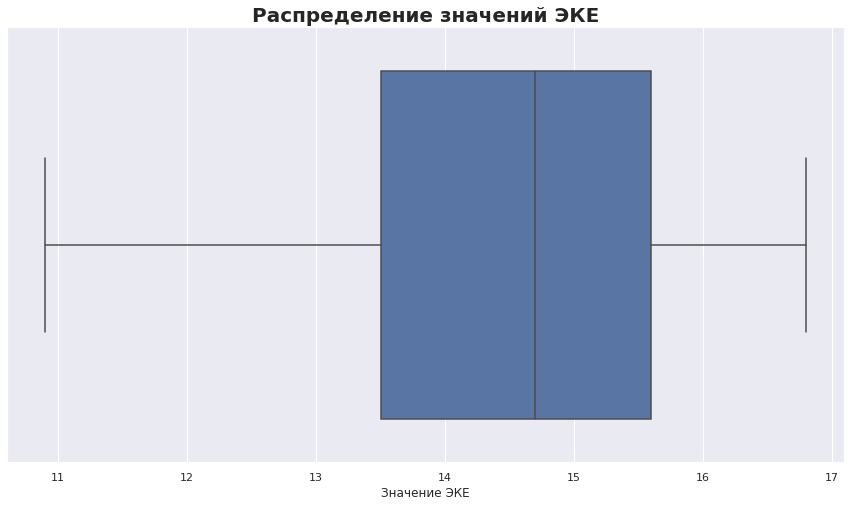

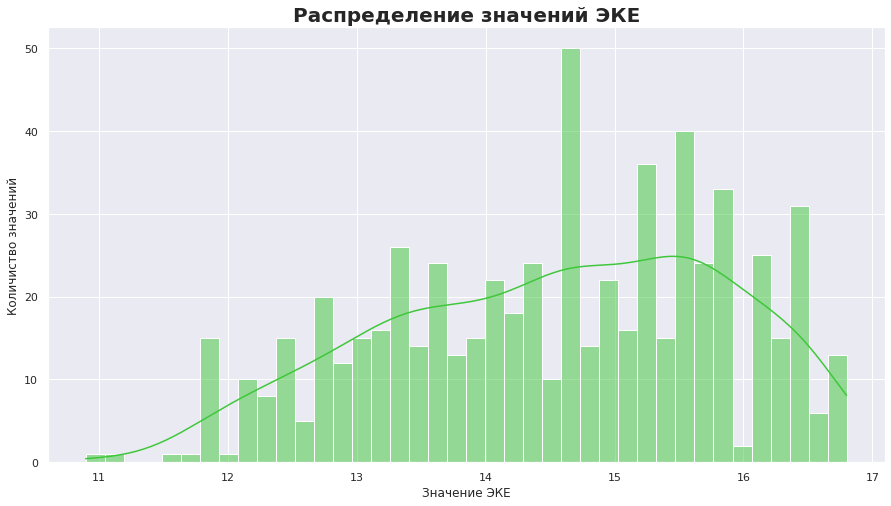

count    629.000000
mean      14.543879
std        1.306408
min       10.900000
25%       13.500000
50%       14.700000
75%       15.600000
max       16.799999
Name: энергетическая_кормовая_единица, dtype: float64

In [39]:
boxplot_creator(
    ferma_main_df,
    'энергетическая_кормовая_единица',
    'Распределение значений ЭКЕ',
    'Значение ЭКЕ'
)
    
histogram_creator(
    ferma_main_df,
    'энергетическая_кормовая_единица',
    40,
    'Распределение значений ЭКЕ',
    'Значение ЭКЕ',
    'Количиство значений'
)

По полученным значениям можно сказать, что данные распределены нормально. На боксплот графике даже не отобразились выбросы, но все равно значения немного смещены выпарво. Размах значений не большой, стандартное отклонение тоже. Среднее значение равно **14.54**, медианное **14.7** - маленький разброс говорит о том, что в данных нет выбросов.

### Исследование столбца сырой_протеин_г

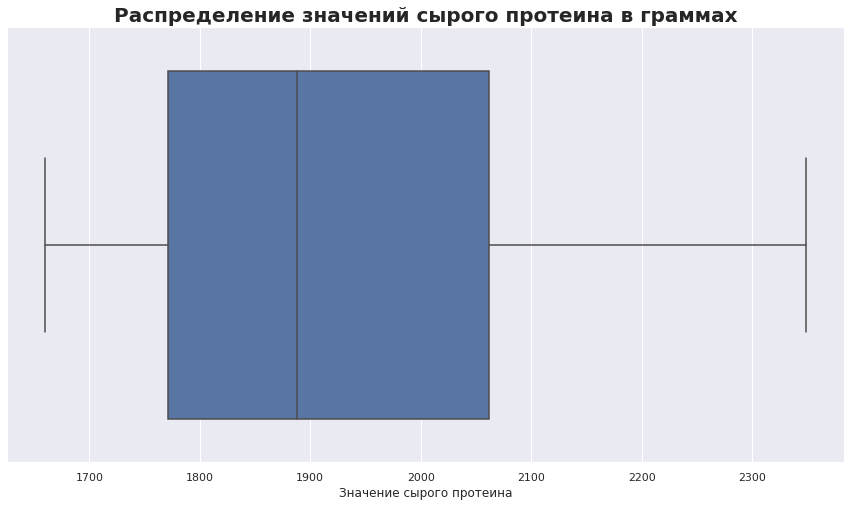

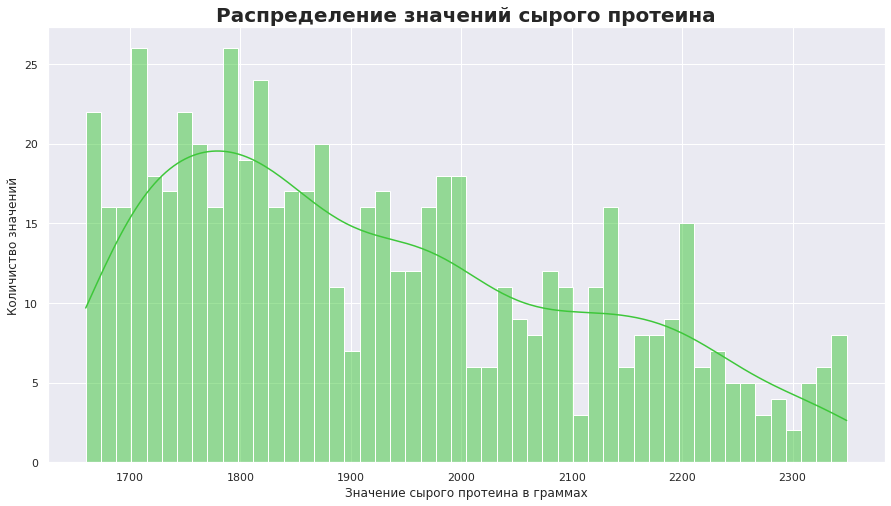

count     629.000000
mean     1923.364070
std       182.956251
min      1660.000000
25%      1771.000000
50%      1888.000000
75%      2062.000000
max      2349.000000
Name: сырой_протеин_г, dtype: float64

In [40]:
boxplot_creator(
    ferma_main_df,
    'сырой_протеин_г',
    'Распределение значений сырого протеина в граммах',
    'Значение сырого протеина'
)
    
histogram_creator(
    ferma_main_df,
    'сырой_протеин_г',
    50,
    'Распределение значений сырого протеина',
    'Значение сырого протеина в граммах',
    'Количиство значений'
)

По полученным значениям можно сказать, что данные распределены нормально. На боксплот графике не отобразились выбросы, но все равно значения немного смещены влево. Размах значений не большой, стандартное отклонение тоже. Среднее значение равно **1923.36**, медианное **1888** - неольшой разброс говорит о том, что в данных нет выбросов. Чаще всего встерчаюся корма примерно с **1700 г** и **1800 г** протеина.

### Изучение сахаро-протеиновго соотношения

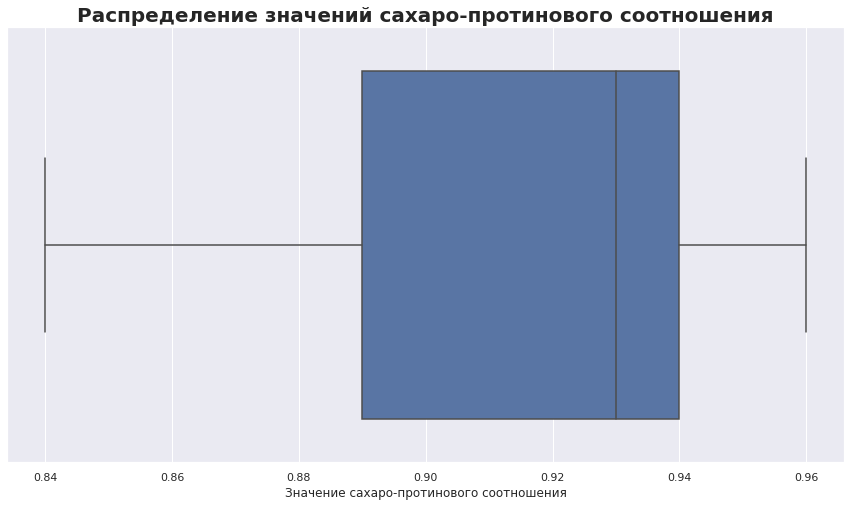

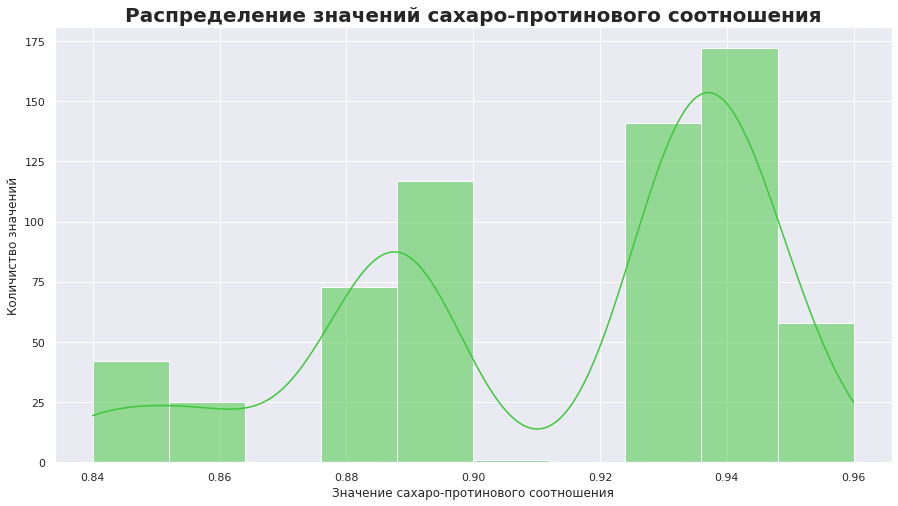

count    629.000000
mean       0.913116
std        0.032203
min        0.840000
25%        0.890000
50%        0.930000
75%        0.940000
max        0.960000
Name: cахаро_протеиновое_соотношение, dtype: float64

In [41]:
boxplot_creator(
    ferma_main_df,
    'cахаро_протеиновое_соотношение',
    'Распределение значений сахаро-протинового соотношения',
    'Значение сахаро-протинового соотношения'
)
    
histogram_creator(
    ferma_main_df,
    'cахаро_протеиновое_соотношение',
    10,
    'Распределение значений сахаро-протинового соотношения',
    'Значение сахаро-протинового соотношения',
    'Количиство значений'
)

В этом столбце все зачения находятся в диапазоне от **0** до **1**. Все значения близки к единице. В нашем датафреймен нет кормов в которых количиство сахара превышало бы количиство протеина. Стандартное отклонение очень маленькое, размах данных тоже. Среднее значение равно **0.913**, медианное **0.93**.

### Изучение типа пастбищ

In [42]:
def pie_creator(df: pd.DataFrame, parametr: str, title: str) -> None:
   
    '''
    Функция принимает на вход изучаемый датафрейм, параметр по которому будет проводиться
    рассчет и назавние которое будет у графика.
    
    Функция не возвращает ничего, а чертит график.
    '''
    
    sns.set()
    plt.figure(figsize=(7, 7))
    plt.pie(
        x=df[parametr].value_counts(),
        autopct='%1.1f%%',
        labels=df[parametr].value_counts().index,
    )
    plt.title(title,
              fontsize=14,
              fontweight='bold'
             )
    plt.show()

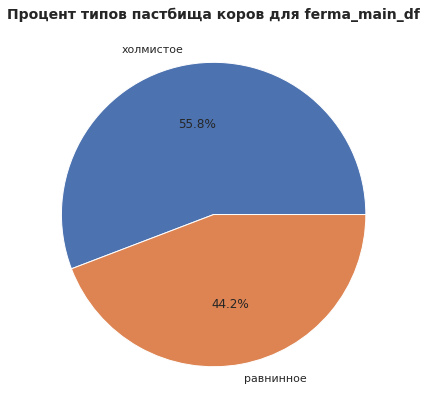

In [43]:
pie_creator(ferma_main_df, 'тип_пастбища', 'Процент типов пастбища коров для ferma_main_df')

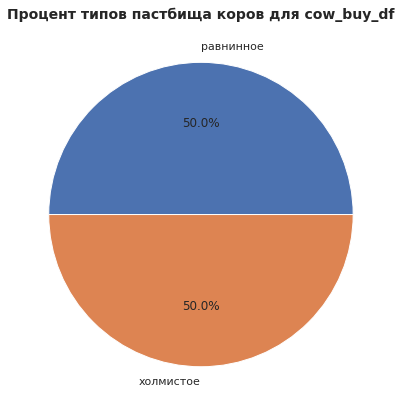

In [44]:
pie_creator(cow_buy_df, 'тип_пастбища', 'Процент типов пастбища коров для cow_buy_df')

По полученным графикам видно, что в в продаже больше коров, которые пасутся на равнинах, но фермер при выборе отобрал равное количиство и тех и других. Возможно он сделал это специально, на этапе корреляционного анализа проверим какие из коров дают больштй удой и, может быть, скорректируем мнение фермера.

### Изучение пород коров

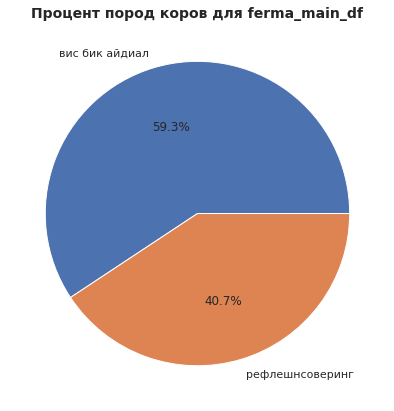

In [45]:
pie_creator(ferma_main_df, 'порода', 'Процент пород коров для ferma_main_df')

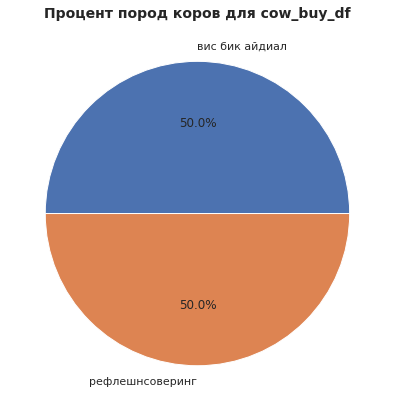

In [46]:
pie_creator(cow_buy_df, 'порода', 'Процент пород коров для cow_buy_df')

После такого стоит задуматься о не случайности такого соотношения в выборе фермера. Скорее всего он действительно выбирает, и тех и других в равном количесте. Это может быть связано с тем, что он не изучил все характеристики каждой породы полностью. С этим мы ему поможем, но чуть позднее.

Если говорить о данных в общих чертах: ***Вис Бик Айдиал*** является более популярной породой чем ***РефлешнСоверинг***.

### Изучение возростного признака коровы

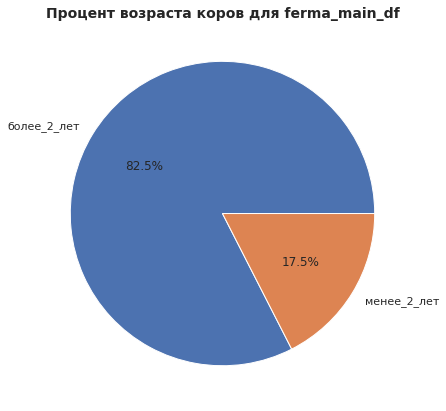

In [47]:
pie_creator(ferma_main_df, 'возраст', 'Процент возраста коров для ferma_main_df')

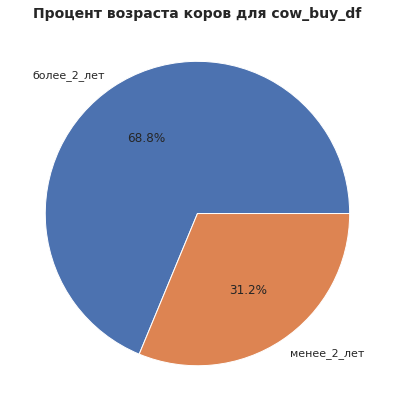

In [48]:
pie_creator(cow_buy_df, 'возраст', 'Процент возраста коров для cow_buy_df')

По полученным графикам видно, что коров старше двух лет намного больше чем коров которые младше. Фермемер тоже рассматиривает к приобретению в большей степени коров, которые старше двух лет, хоть их процент и меньше чем в общих данных.

### Изучение характеристик молока

#### Жирность

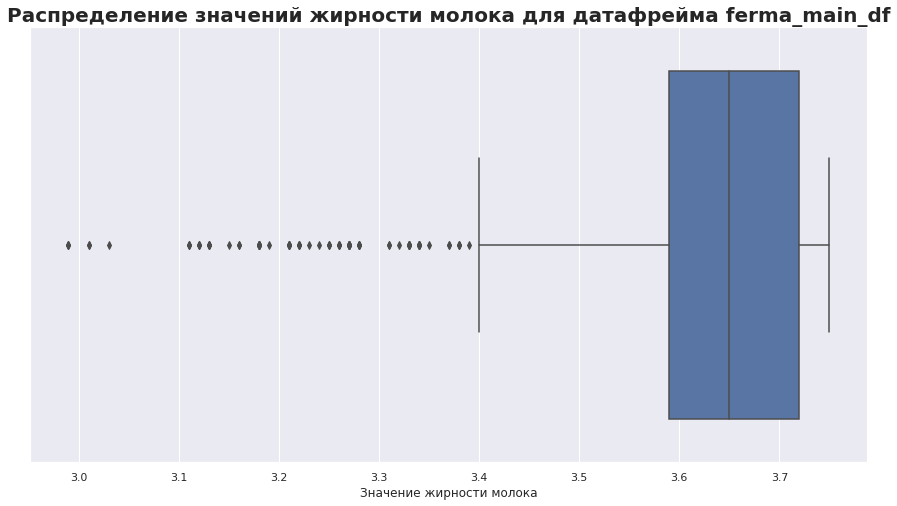

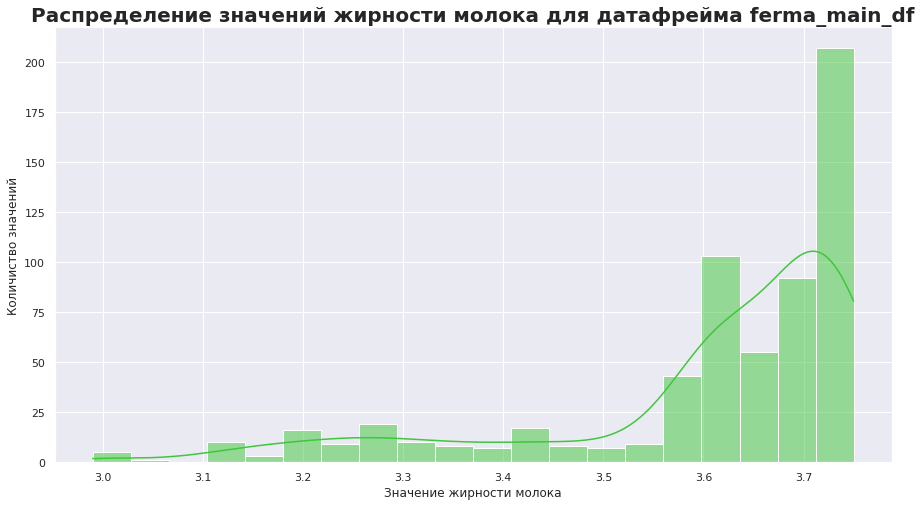

count    629.000000
mean       3.603657
std        0.168656
min        2.990000
25%        3.590000
50%        3.650000
75%        3.720000
max        3.750000
Name: жирность_%, dtype: float64

In [49]:
boxplot_creator(
    ferma_main_df,
    'жирность_%',
    'Распределение значений жирности молока для датафрейма ferma_main_df',
    'Значение жирности молока'
)
    
histogram_creator(
    ferma_main_df,
    'жирность_%',
    20,
    'Распределение значений жирности молока для датафрейма ferma_main_df',
    'Значение жирности молока',
    'Количиство значений'
)

По полученным данным видно, что для значений жирности боксплот показал много выбросов с меньшей стороны, но это нормальные значения жирности молока. А общая картина значений сильно смещена в правую сторону, объясняется это тем, что ,большая часть молока имеет жирность более **3.65%**. Минимальное значение жирности примерно **3%**, максимальное **3.75%** - честно говоря разницу будет заметить даже шефповару. Среднее значение равно **3.6%**, медианное **3.65%**. Нужно посмотреть какую жирность молока предпочитает фермер.

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>



Успех 👍:


    но это нормальные значения жирности молока
    
    
👍




</div>


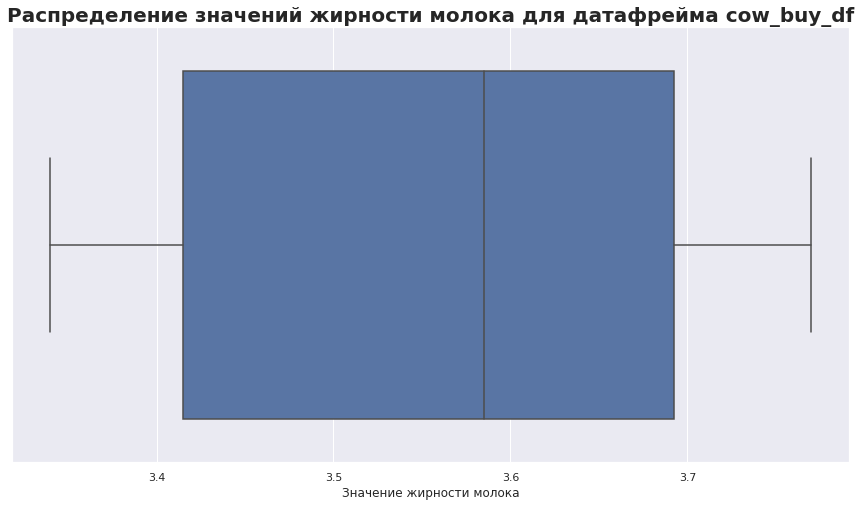

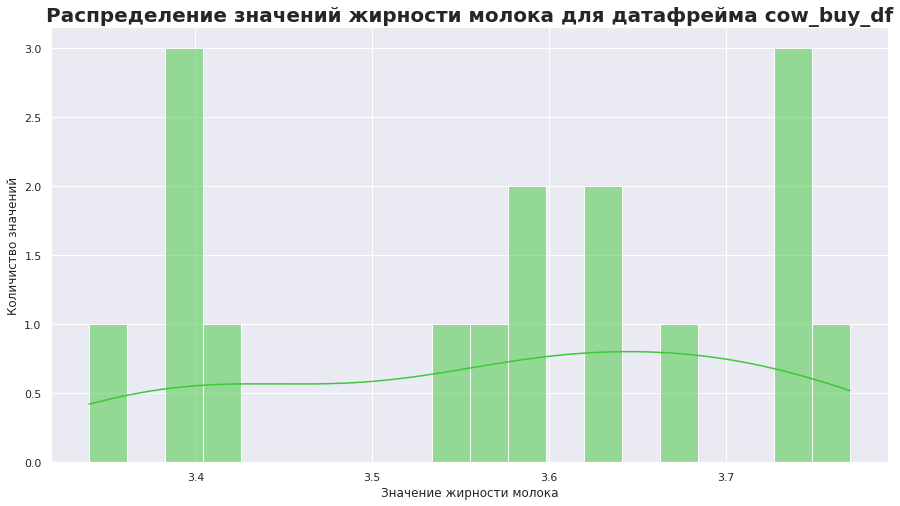

count    16.000000
mean      3.571875
std       0.141620
min       3.340000
25%       3.415000
50%       3.585000
75%       3.692500
max       3.770000
Name: текущая_жирность_%, dtype: float64

In [50]:
boxplot_creator(
    cow_buy_df,
    'текущая_жирность_%',
    'Распределение значений жирности молока для датафрейма cow_buy_df',
    'Значение жирности молока'
)
    
histogram_creator(
    cow_buy_df,
    'текущая_жирность_%',
    20,
    'Распределение значений жирности молока для датафрейма cow_buy_df',
    'Значение жирности молока',
    'Количиство значений'
)

Фермер предпочитат молоко с жирностью не меньше чем **3.34%** и не жирнее чем **3.77%**. Молоко процентом выше чем в общем датафрейме (**ferma_main_df**) объясняется тем, что в датафрейме **cow_buy_df** белок и жирность молока указаны на момент покупки — когда «ЭкоФерма» давала им свой корм.

#### Белок

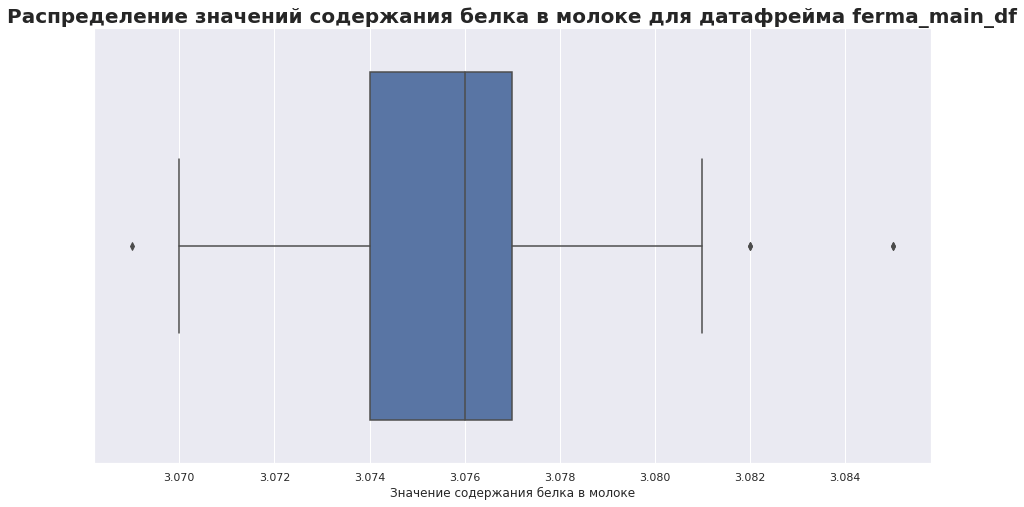

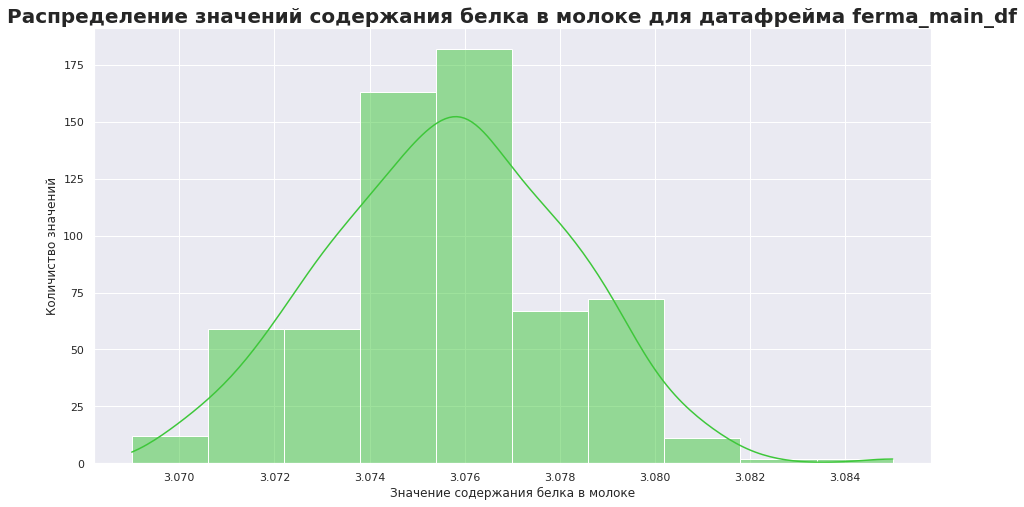

count    629.000000
mean       3.075671
std        0.002549
min        3.069000
25%        3.074000
50%        3.076000
75%        3.077000
max        3.085000
Name: белок_%, dtype: float64

In [51]:
boxplot_creator(
    ferma_main_df,
    'белок_%',
    'Распределение значений содержания белка в молоке для датафрейма ferma_main_df',
    'Значение содержания белка в молоке'
)
    
histogram_creator(
    ferma_main_df,
    'белок_%',
    10,
    'Распределение значений содержания белка в молоке для датафрейма ferma_main_df',
    'Значение содержания белка в молоке',
    'Количиство значений'
)

Распределение значений процента белка очень похоже на норимальное распределение. У него очень маленькое стандартное отклонение, значит выбросов в данных быть не должною. Но боксплот показал нам три выброса, но они не выбиваются из общей картины. Среднее значение равно примерно **3.08%**, медианное тоже примерно **3.08%**. Нужно рассмотреть какой процент содержания белка в молоке предпочитает фермер.

In [52]:
cow_buy_df.head()

,порода,тип_пастбища,порода_папы_быка,имя_папы,текущая_жирность_%,текущий_уровень_белок_%,возраст
0,вис бик айдиал,холмистое,айдиал,геркулес,3.58,3.076,более_2_лет
1,вис бик айдиал,равнинное,соверин,буйный,3.54,3.081,менее_2_лет
2,рефлешнсоверинг,равнинное,соверин,барин,3.59,3.074,более_2_лет
3,рефлешнсоверинг,холмистое,айдиал,буйный,3.40,3.061,более_2_лет
4,рефлешнсоверинг,равнинное,айдиал,буйный,3.64,3.074,более_2_лет


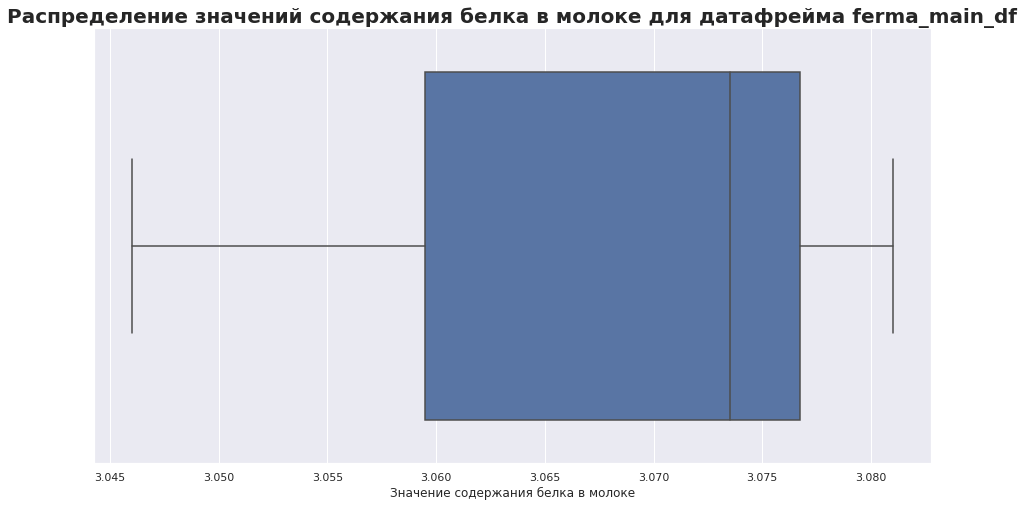

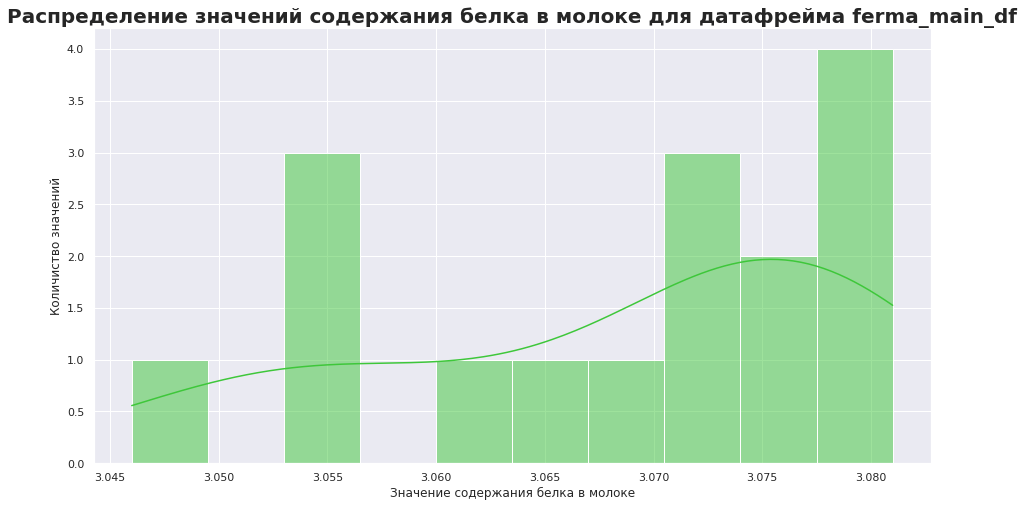

count    16.000000
mean      3.068250
std       0.011264
min       3.046000
25%       3.059500
50%       3.073500
75%       3.076750
max       3.081000
Name: текущий_уровень_белок_%, dtype: float64

In [53]:
boxplot_creator(
    cow_buy_df,
    'текущий_уровень_белок_%',
    'Распределение значений содержания белка в молоке для датафрейма ferma_main_df',
    'Значение содержания белка в молоке'
)
    
histogram_creator(
    cow_buy_df,
    'текущий_уровень_белок_%',
    10,
    'Распределение значений содержания белка в молоке для датафрейма ferma_main_df',
    'Значение содержания белка в молоке',
    'Количиство значений'
)

Фермер предпочитает молоко со средним содержание белка, т.е. со значением примерно равным **3.06**.

#### Удой

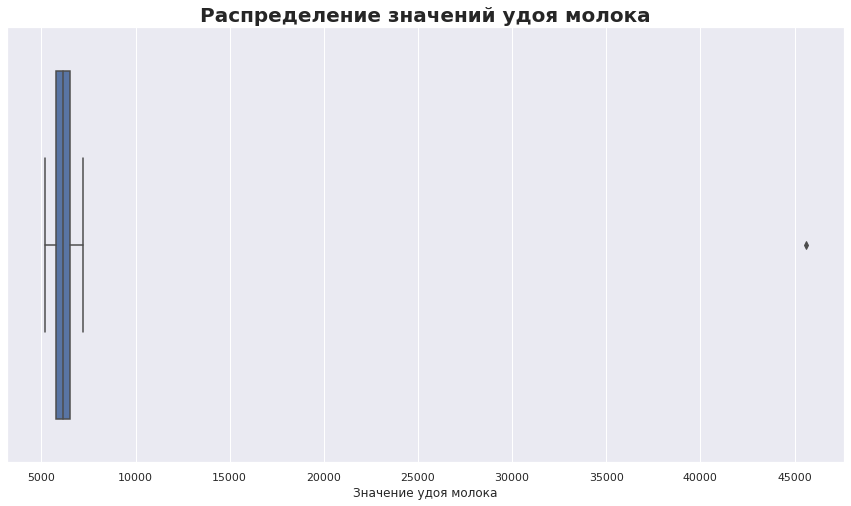

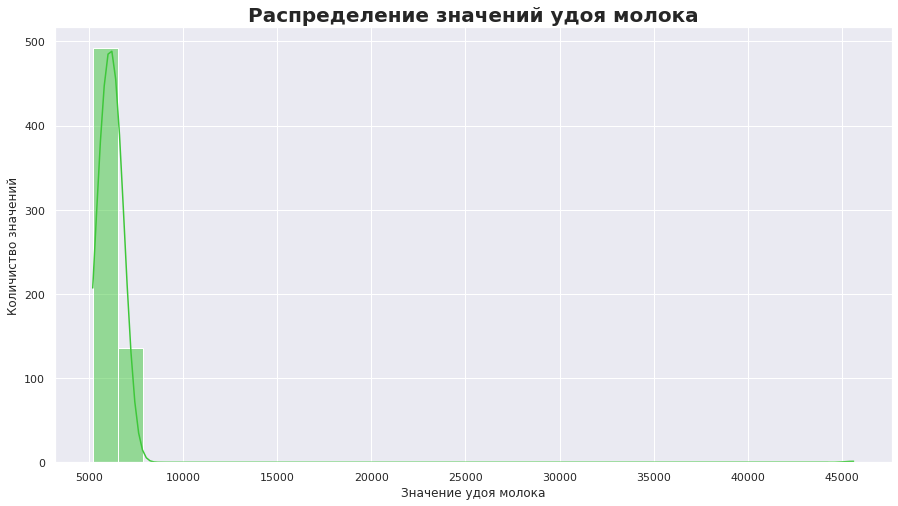

count      629.000000
mean      6188.750397
std       1644.795489
min       5204.000000
25%       5751.000000
50%       6133.000000
75%       6501.000000
max      45616.000000
Name: удой_кг, dtype: float64

In [54]:
boxplot_creator(
    ferma_main_df,
    'удой_кг',
    'Распределение значений удоя молока',
    'Значение удоя молока'
)
    
histogram_creator(
    ferma_main_df,
    'удой_кг',
    30,
    'Распределение значений удоя молока',
    'Значение удоя молока',
    'Количиство значений'
)

Следует рассмотреть значения без этого выброса, так как он все портит.

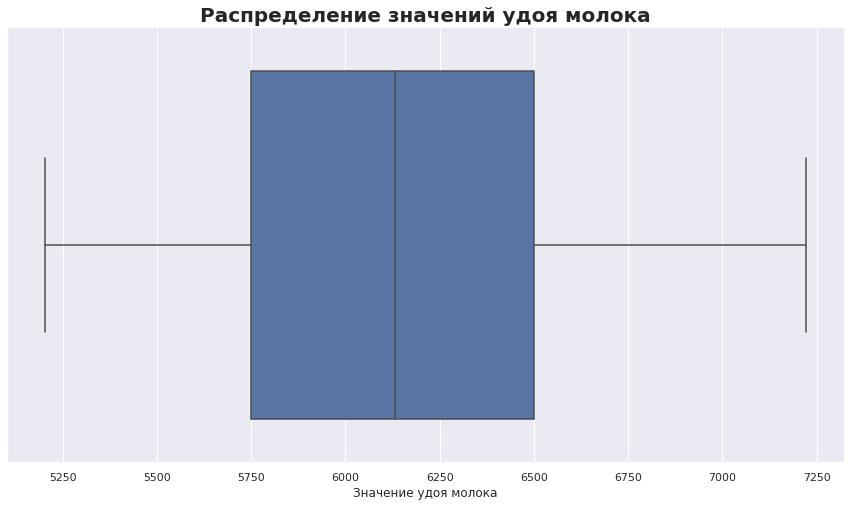

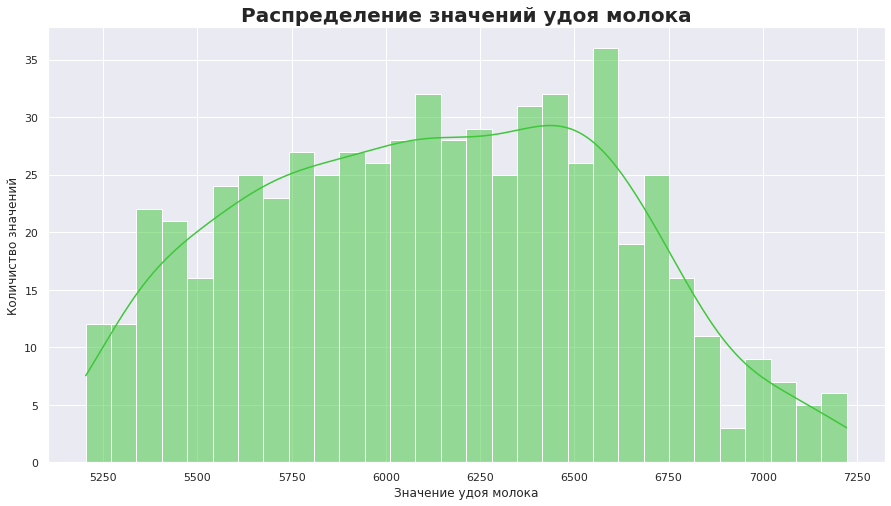

count     628.000000
mean     6125.968153
std       475.857053
min      5204.000000
25%      5749.750000
50%      6132.500000
75%      6501.000000
max      7222.000000
Name: удой_кг, dtype: float64

In [55]:
boxplot_creator(
    ferma_main_df.query('удой_кг < 45000'),
    'удой_кг',
    'Распределение значений удоя молока',
    'Значение удоя молока'
)
    
histogram_creator(
    ferma_main_df.query('удой_кг < 45000'),
    'удой_кг',
    30,
    'Распределение значений удоя молока',
    'Значение удоя молока',
    'Количиство значений'
)

Все-таки удалим этот выброс, так как из-за него значение стандартного отклонения очень сильно возросло. Среднее значение равно **6125.97 кг**, медианное **6132.5 кг**. Максимальный удой за год составил **7222 кг**, а минимальный **5204**. Чаще всего встречаются коровы удой который находится в диапазоне от **6550 кг** до **6600 кг**.

In [56]:
ferma_main_df = ferma_main_df.query('удой_кг < 45000')

#### Вкус

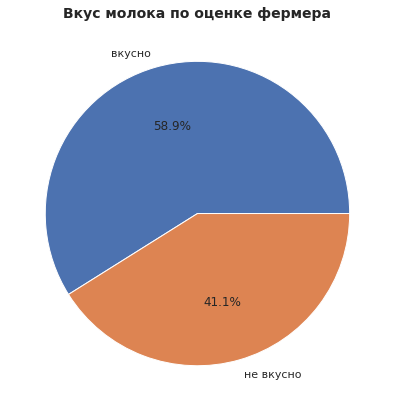

In [57]:
pie_creator(ferma_main_df, 'вкус_молока', 'Вкус молока по оценке фермера')

По полученным данным видно, что фермеру нравится большая часть молока, которое он пробовал.

### Общий вывод по исследовательскому анализу
Для исследовательского анализа данных в работе использовались созданные функции для построения графиков. Резюмируя результаты исследовательского анализа:

- ЭКЕ распределено нормально. Среднее значение равно 14.54, медианное 14.7 - маленький разброс говорит о том, что в данных нет выбросов.
- Среднее значение сырого протеина в граммах равно 1923.36, медианное 1888 - неольшой разброс говорит о том, что в данных нет выбросов. Чаще всего встерчаюся корма примерно с 1700 г и 1800 г протеина.
- Стандартное отклонение СПО очень маленькое, размах данных тоже. Среднее значение равно **0.913**, медианное **0.93**.
- Большинство коров пасутся на равнинах, но фермер при выборе отобрал равное количиство и тех и других.
- ***Вис Бик Айдиал*** является более популярной породой чем ***РефлешнСоверинг***. Фермер отобрал равное количиство коров обеих пород.
- Большинство коров старге двух лет.
- Фермер предпочитат молоко с жирностью не меньше чем **3.34%** и не жирнее чем **3.77%**
- Фермер предпочитает молоко со средним содержание белка, т.е. со значением примерно равным **3.06**.
- Среднее значение равно **6125.97 кг**, медианное **6132.5 кг**. Максимальный удой за год составил **7222 кг**, а минимальный **5204**. Чаще всего встречаются коровы удой который находится в диапазоне от **6550 кг** до **6600 кг**. Пришлось удалить один огромный выброс.
- Фермеру нравится большая часть молока, которое он пробовал.

## Корреляционный анализ

In [58]:
def heatmap_corr_creator(df: pd.DataFrame, columns: list, title: str) -> None:
    '''
    Функция принимает на вход датафрейм и список столбцов(численного типа). Так же на
    вход принимается значения которое будут подставлен в заголовок всего графика.
    
    Функция ничегол не возвращает.
    '''
    sns.set()
    plt.figure(figsize=(15,9))
    sns.heatmap(df[columns].corr(),
                annot=True,
                linewidth=.5,
                cmap='GnBu'
               )
    plt.title(title,
              fontsize=20,
              fontweight='bold'
             )
    plt.show()

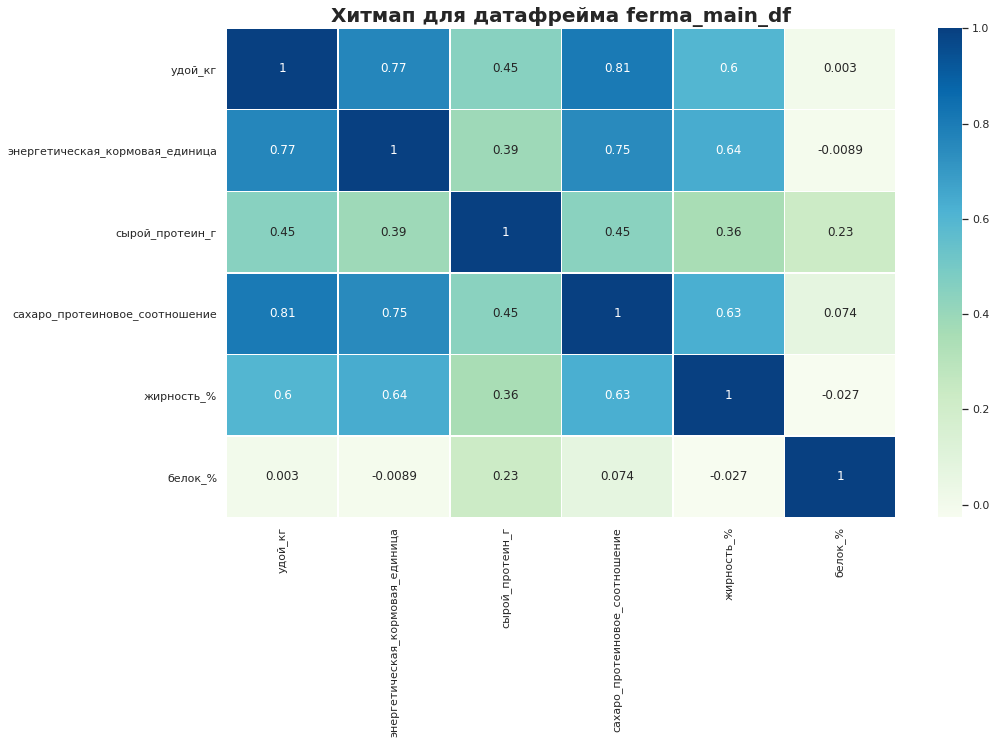

In [59]:
num_columns  = ['удой_кг', 'энергетическая_кормовая_единица', 'сырой_протеин_г',
                'cахаро_протеиновое_соотношение', 'жирность_%', 'белок_%'
               ]

heatmap_corr_creator(ferma_main_df,
                num_columns,
                'Хитмап для датафрейма ferma_main_df'
)

В наших данных я не заметиль мультиколлинеарности. Входные параметры не сильно коррелируют меджу собой, значит модель не должна дать ложных предсказаний. 

### Изучение зависимости вкуса молока и удоя от корма коровы

#### ЭКЕ

In [60]:
def scatterplot_creator(df: pd.DataFrame,
                        parametr_x: str,
                        parametr_y: str,
                        title: str,
                        xlabel: str,
                        ylabel: str,
                        hue=None, 
                       ) -> None:
    
    '''
    Функция принимает на фход датафрейм, параметры по которым будет строиться график и 
    именя для оглавления всего графиков и имен осей. По заданным параметрам функция 
    нарисует диаграмму рассеяния и отобразит коэффициент корреляции.
    '''
    
    sns.set()
    plt.figure(figsize=(9,9)),
    sns.scatterplot(
        data=df,
        x=parametr_x,
        y=parametr_y,
        hue=hue
    )
    plt.title(title,
              fontsize=20,
              fontweight='bold'
             )
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()
    display(df[[parametr_y, parametr_x]].corr())

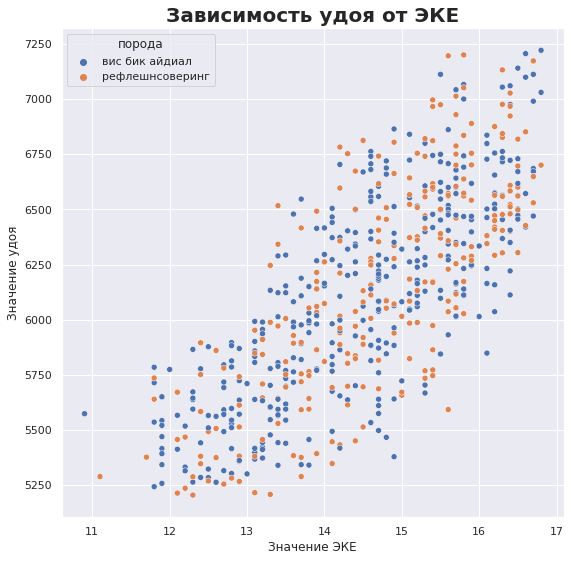

,удой_кг,энергетическая_кормовая_единица
удой_кг,1.000000,0.765098
энергетическая_кормовая_единица,0.765098,1.000000


In [61]:
scatterplot_creator(ferma_main_df, 
                    'энергетическая_кормовая_единица',
                    'удой_кг',
                    'Зависимость удоя от ЭКЕ',
                    'Значение ЭКЕ',
                    'Значение удоя',
                    'порода'
                   )

По полученным данным, на лицо видна линейная зависимость между этими признаками. Об этом так же говорит высокий коэффициент корреляции равный **0.765**. Для двух пород распределения примерно одинаковы.

In [62]:
def catplot_creator(df: pd.DataFrame,
                      parametr_x: str,
                      parametr_y: str,
                      title: str,
                      xlabel: str,
                      ylabel: str) -> None:
    
    '''
    Функция принимает на вход датафрейм и параметры по которым будет строиться график. Так же на
    вход принимается значения которые будут подставлены в заголовок всего графика и его осей.
    
    Функция ничегол не возвращает.
    '''
    
    sns.set()
    plt.figure(figsize=(15, 8))
    sns.catplot(data=df,
                x=parametr_x,
                y=parametr_y,
                kind="box"
               )
    plt.title(title,
              fontsize=20,
              fontweight='bold'
             )
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()
    
    display(spearmanr(ferma_main_df[parametr_x], ferma_main_df[parametr_y]))
    display(kendalltau(ferma_main_df[parametr_x], ferma_main_df[parametr_y]))

<Figure size 1080x576 with 0 Axes>

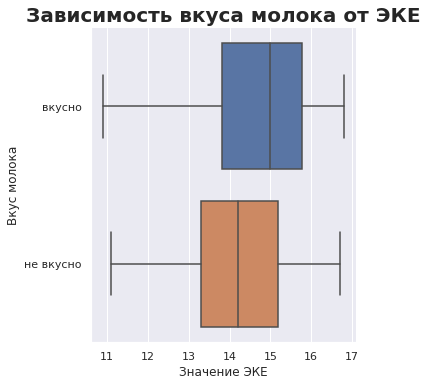

/opt/conda/lib/python3.9/site-packages/scipy/stats/_stats_py.py:110: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  warnings.warn("The input array could not be properly "


SpearmanrResult(correlation=-0.22517689862855383, pvalue=1.1627289304327046e-08)

KendalltauResult(correlation=-0.1860281285940527, pvalue=1.7161517732644483e-08)

In [63]:
catplot_creator(ferma_main_df,
                  'энергетическая_кормовая_единица',
                  'вкус_молока',
                  'Зависимость вкуса молока от ЭКЕ',
                  'Значение ЭКЕ',
                  'Вкус молока'
                 )

Судя по полученным данным фермеру чаще нравилось молоко, которое было получено после скормки корма с ЭКЕ равным примерно примерно 15, так же заметна тенденция того, что чем меньше ЭКЕ содержится в корме, тем менее вероятно такое молоко понравится фермеру. Но никакой корреляции между этими значениями нет

#### Сырой протеин

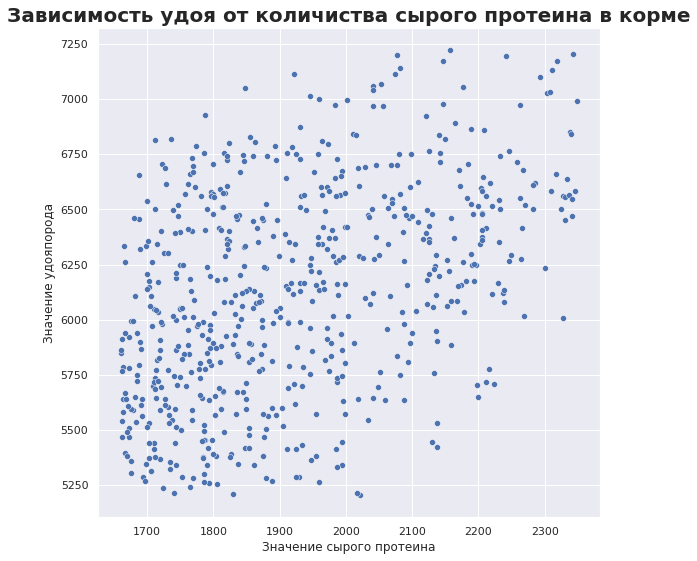

,удой_кг,сырой_протеин_г
удой_кг,1.000000,0.446731
сырой_протеин_г,0.446731,1.000000


In [64]:
scatterplot_creator(ferma_main_df, 
                    'сырой_протеин_г',
                    'удой_кг',
                    'Зависимость удоя от количиства сырого протеина в корме',
                    'Значение сырого протеина',
                    'Значение удоя'
                    'порода'
                   )

По полученным данным можно сказать, что между удоем и значением содержания сырого протеина в корме почти нет никакой корреляции. На графике можно увидеть некую сонаправленность значений, но у них слишком большой разброс. Для двух пород распределения примерно одинаковые.

<Figure size 1080x576 with 0 Axes>

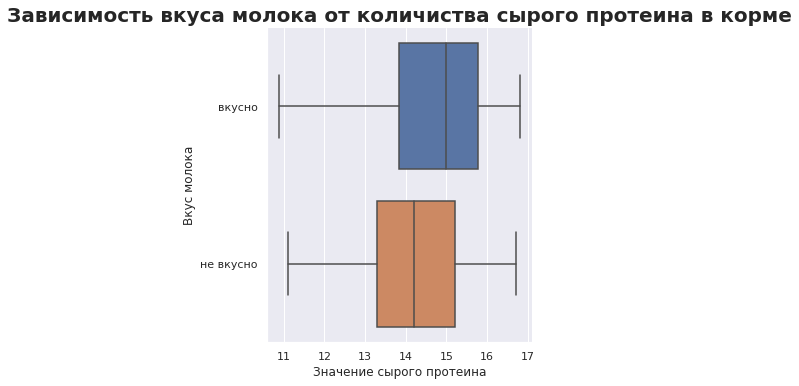

/opt/conda/lib/python3.9/site-packages/scipy/stats/_stats_py.py:110: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  warnings.warn("The input array could not be properly "


SpearmanrResult(correlation=-0.22517689862855383, pvalue=1.1627289304327046e-08)

KendalltauResult(correlation=-0.1860281285940527, pvalue=1.7161517732644483e-08)

In [65]:
catplot_creator(ferma_main_df,
                  'энергетическая_кормовая_единица',
                  'вкус_молока',
                  'Зависимость вкуса молока от количиства сырого протеина в корме',
                  'Значение сырого протеина',
                  'Вкус молока'
                 )

Никакой особой зависимости между вкусом молока и содержанием сырого протеина в корме тоже нет. Можно сказать только, что фермеру немного больше нравится молоко, которое было произведено из корма в котором содержание сырого протеина было немного больше.

#### Сахаро-протеиновое отношение

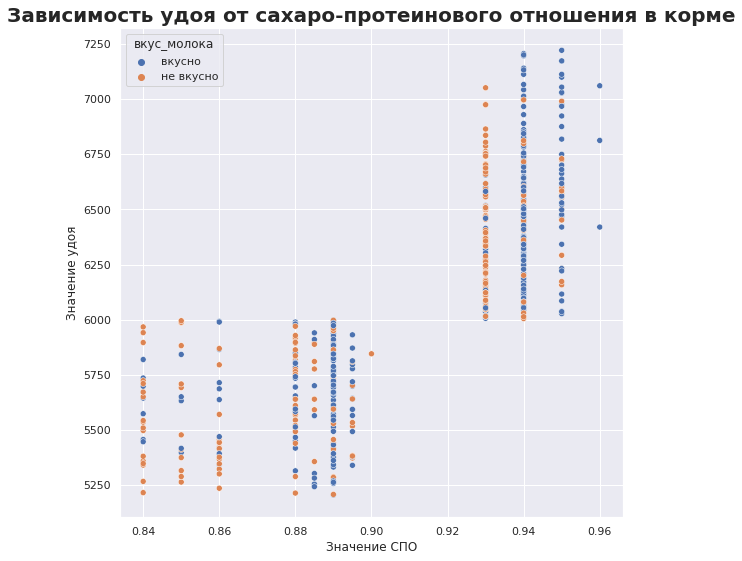

,удой_кг,cахаро_протеиновое_соотношение
удой_кг,1.000000,0.806339
cахаро_протеиновое_соотношение,0.806339,1.000000


In [66]:
scatterplot_creator(ferma_main_df, 
                    'cахаро_протеиновое_соотношение',
                    'удой_кг',
                    'Зависимость удоя от сахаро-протеинового отношения в корме',
                    'Значение СПО',
                    'Значение удоя',
                    'вкус_молока'
                   )

На графике трудно разглядеть линейную зависимость, но коэффициент корреляции говорит о том, что она есть и она достатончо большая. Предлагаю проверить это при помощи корреляции Спирмена и Кендела. Для двух пород распределения примерно одинаковы.

In [67]:
spearmanr(ferma_main_df['удой_кг'], ferma_main_df['cахаро_протеиновое_соотношение'])

SpearmanrResult(correlation=0.787904090851949, pvalue=6.236376891916343e-134)

In [68]:
kendalltau(ferma_main_df['удой_кг'], ferma_main_df['cахаро_протеиновое_соотношение'])

KendalltauResult(correlation=0.5955101743875045, pvalue=1.3759533301205158e-95)

Обе корреляции показали, что в данных присутствует линейная зависимость и мальнекое значение pvalue говорит о том, что оно статистически значимо.

<Figure size 1080x576 with 0 Axes>

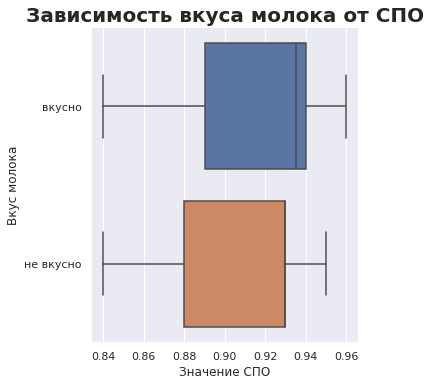

/opt/conda/lib/python3.9/site-packages/scipy/stats/_stats_py.py:110: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  warnings.warn("The input array could not be properly "


SpearmanrResult(correlation=-0.2590405884298575, pvalue=4.355782725952304e-11)

KendalltauResult(correlation=-0.22774827641846362, pvalue=8.793021166784279e-11)

In [69]:
catplot_creator(ferma_main_df,
                  'cахаро_протеиновое_соотношение',
                  'вкус_молока',
                  'Зависимость вкуса молока от СПО',
                  'Значение СПО',
                  'Вкус молока'
                 )

Как и в прошлом случае СПО в корме не сильно отражается на мнение фермера о молоке, можно только сказать, что фермеру чуть больше нравится молоко, которое было получено от коров, которые ели корм с немного большим CПО. C CПО от **0.94** почти нет молока оторое не понравилось фермеру.

### Изучение зависимости вкуса молока и удоя от типа пастбища

<Figure size 1080x576 with 0 Axes>

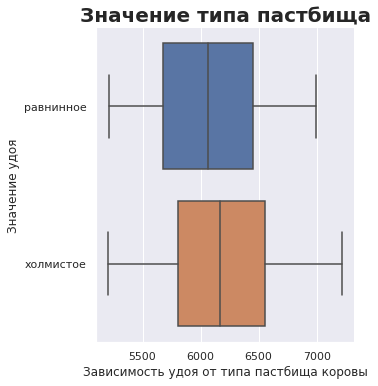

/opt/conda/lib/python3.9/site-packages/scipy/stats/_stats_py.py:110: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  warnings.warn("The input array could not be properly "


SpearmanrResult(correlation=0.11896783634216439, pvalue=0.002826557426953995)

KendalltauResult(correlation=0.09724385921248951, pvalue=0.002892371966871871)

In [70]:
catplot_creator(ferma_main_df, 
                'удой_кг',
                'тип_пастбища',
                'Значение типа пастбища',
                'Зависимость удоя от типа пастбища коровы',
                'Значение удоя'
                )

Можно сказать, что коровы которые пасутся на холмистых пастбищах в основном дают немного больше молока в год, чем те коровы, что пасутся на равнинах.

In [71]:
def countplot_creator(df: pd.DataFrame,
                      parametr_x: str,
                      parametr_y: str,
                      title: str,
                      xlabel: str,
                      ylabel: str) -> None:
    
    '''
    Функция принимает на вход датафрейм и параметры по которым будет строиться график. Так же на
    вход принимается значения которые будут подставлены в заголовок всего графика и его осей.
    
    Функция ничегол не возвращает.
    '''
    
    sns.set()
    plt.figure(figsize=(15, 8))
    sns.countplot(data=ferma_main_df, x=parametr_x, hue=parametr_y)
    plt.title(title,
              fontsize=20,
              fontweight='bold'
             )
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()
    
    display(spearmanr(ferma_main_df[parametr_x], ferma_main_df[parametr_y]))
    display(kendalltau(ferma_main_df[parametr_x], ferma_main_df[parametr_y]))
    

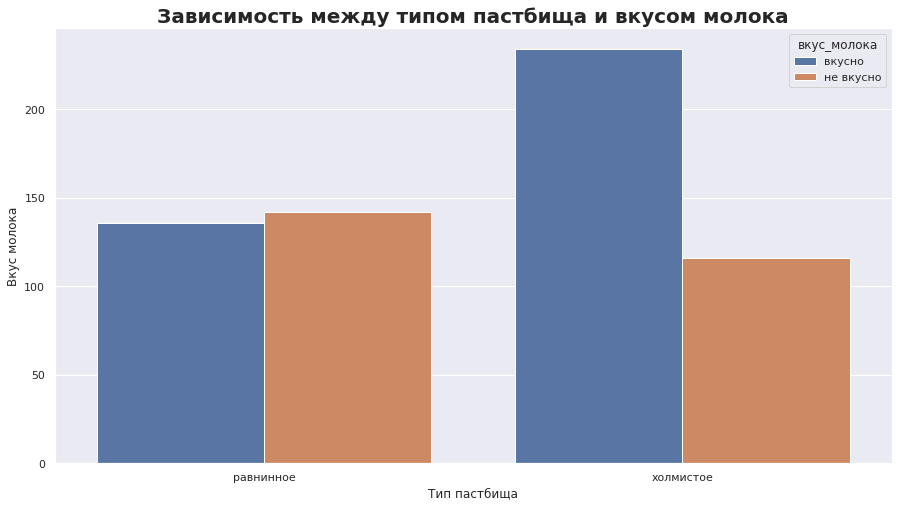

/opt/conda/lib/python3.9/site-packages/scipy/stats/_stats_py.py:110: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  warnings.warn("The input array could not be properly "


SpearmanrResult(correlation=-0.1810831619181594, pvalue=4.954705489569831e-06)

KendalltauResult(correlation=-0.18108316191815937, pvalue=5.779029371029822e-06)

In [72]:
countplot_creator(ferma_main_df,
                  'тип_пастбища',
                  'вкус_молока',
                  'Зависимость между типом пастбища и вкусом молока',
                  'Тип пастбища',
                  'Вкус молока'
                 )

По полученным данным можно сказать, что с большей вероятностью фермеру понравится молоко коровы, которая пасласть в холмистой местности. Молоко коров с равнин нравились фермеру с равныой частотой. Судя по коэффициетам коррелции оная отсутвует и вкус молока не зависит от типа пастбища коровы.

### Изучение зависисмости удоя от возраста коровы

Для определения зависимости удоя от возраста коровы рассмотрим теже графики, что в изучении зависимости удоя от корма коровы, только с дополнительным параметром, который визуализирует влияние возраста на удой.

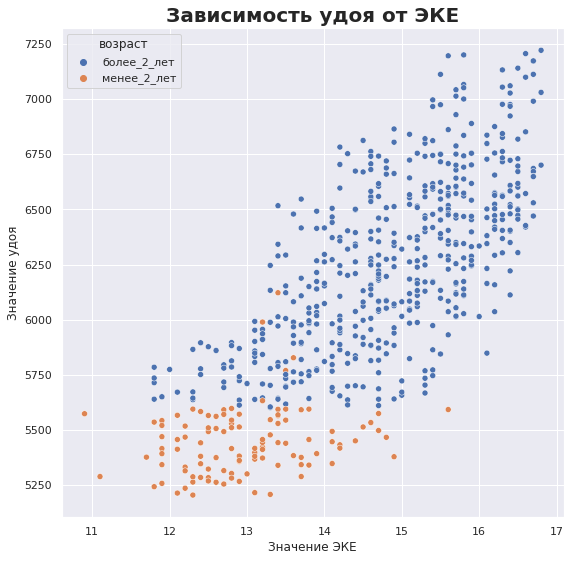

,удой_кг,энергетическая_кормовая_единица
удой_кг,1.000000,0.765098
энергетическая_кормовая_единица,0.765098,1.000000


In [73]:
scatterplot_creator(ferma_main_df, 
                    'энергетическая_кормовая_единица',
                    'удой_кг',
                    'Зависимость удоя от ЭКЕ',
                    'Значение ЭКЕ',
                    'Значение удоя',
                    'возраст'
                   )

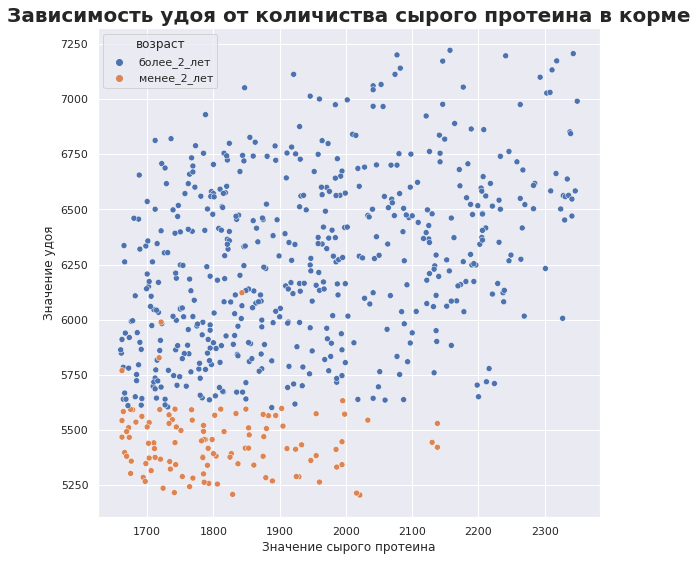

,удой_кг,сырой_протеин_г
удой_кг,1.000000,0.446731
сырой_протеин_г,0.446731,1.000000


In [74]:
scatterplot_creator(ferma_main_df, 
                    'сырой_протеин_г',
                    'удой_кг',
                    'Зависимость удоя от количиства сырого протеина в корме',
                    'Значение сырого протеина',
                    'Значение удоя',
                    'возраст'
                   )

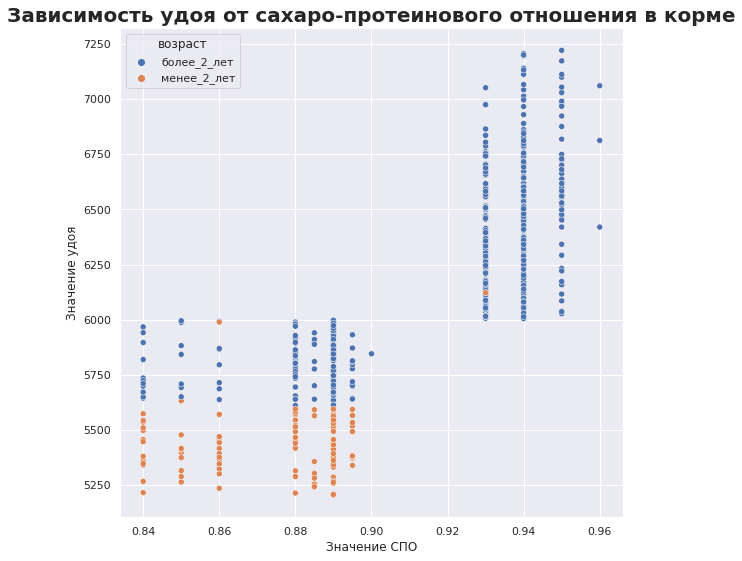

,удой_кг,cахаро_протеиновое_соотношение
удой_кг,1.000000,0.806339
cахаро_протеиновое_соотношение,0.806339,1.000000


In [75]:
scatterplot_creator(ferma_main_df, 
                    'cахаро_протеиновое_соотношение',
                    'удой_кг',
                    'Зависимость удоя от сахаро-протеинового отношения в корме',
                    'Значение СПО',
                    'Значение удоя',
                    'возраст'
                   )

По полученным данным видно, что возраст сильно влияет на то, сколько молока может дать корова в год. Молодые коровы (коровы, которые младше двух лет) дают меньше молока чем взрослые особи. Молодая корова дает примерно **5500 кг** молока в год, а взрослая **6500 кг**.

### Изучение зависимости вкуса и удоя молока от его жирности и количиства белка в нем

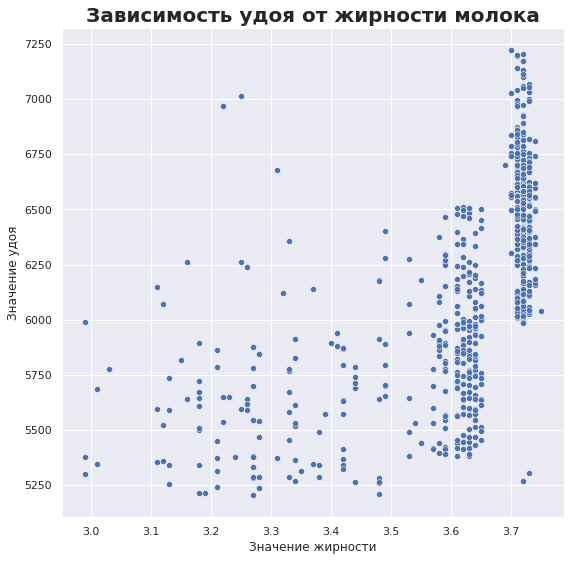

,удой_кг,жирность_%
удой_кг,1.000000,0.600902
жирность_%,0.600902,1.000000


In [76]:
scatterplot_creator(ferma_main_df, 
                    'жирность_%',
                    'удой_кг',
                    'Зависимость удоя от жирности молока',
                    'Значение жирности',
                    'Значение удоя'
                   )

Можно разглядеть некоторую линейную зависимость между удоем и жирностью молока. Большинство коров дает молоко высокой жирности, начиная от **3.5%**. Порода коровы не влияет на жирноть молока которое она производит.

<Figure size 1080x576 with 0 Axes>

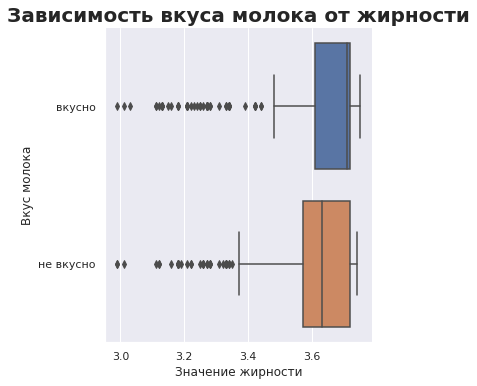

/opt/conda/lib/python3.9/site-packages/scipy/stats/_stats_py.py:110: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  warnings.warn("The input array could not be properly "


SpearmanrResult(correlation=-0.13524371743117847, pvalue=0.0006786309133643344)

KendalltauResult(correlation=-0.11458262482509597, pvalue=0.000707906986939012)

In [77]:
catplot_creator(ferma_main_df,
                  'жирность_%',
                  'вкус_молока',
                  'Зависимость вкуса молока от жирности',
                  'Значение жирности',
                  'Вкус молока'
                 )

Можно сказать, что вкус фермера не привязан к жирности молока.

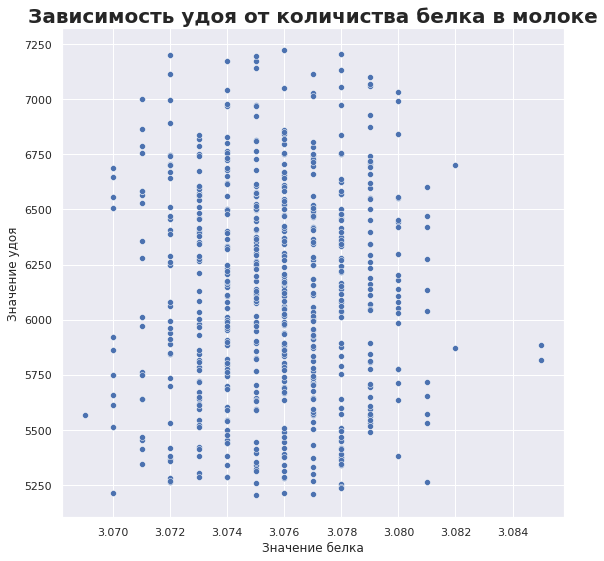

,удой_кг,белок_%
удой_кг,1.000000,0.002966
белок_%,0.002966,1.000000


In [78]:
scatterplot_creator(ferma_main_df, 
                    'белок_%',
                    'удой_кг',
                    'Зависимость удоя от количиства белка в молоке',
                    'Значение белка',
                    'Значение удоя'
                   )

Между удоем молока и количиством белка в нем нет линейной зависимости. можно сказать, что в основном коровы дают молоко со средним показателем белка.

<Figure size 1080x576 with 0 Axes>

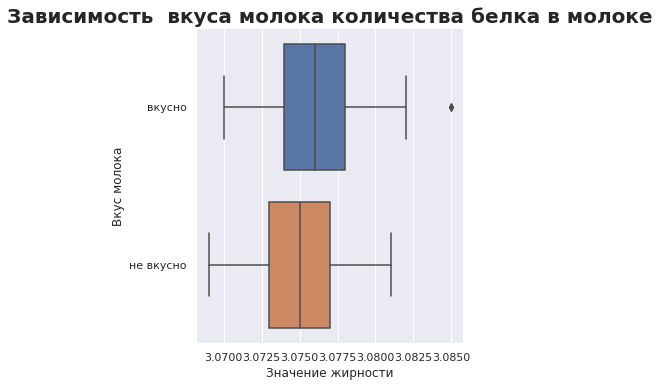

/opt/conda/lib/python3.9/site-packages/scipy/stats/_stats_py.py:110: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  warnings.warn("The input array could not be properly "


SpearmanrResult(correlation=-0.11593037216595302, pvalue=0.0036231595754535805)

KendalltauResult(correlation=-0.09961782059151676, pvalue=0.0036973315508609457)

In [79]:
catplot_creator(ferma_main_df,
                  'белок_%',
                  'вкус_молока',
                  'Зависимость  вкуса молока количества белка в молоке',
                  'Значение жирности',
                  'Вкус молока'
                 )

Можно сказать, что фермеру немного больше нравится молоко с большим содержаением белка, но это разница слишком несущественна, чтобы говорить о какой либо зависимости.

### Изучение влияния породы папы быка на вкус молока и на удой за год

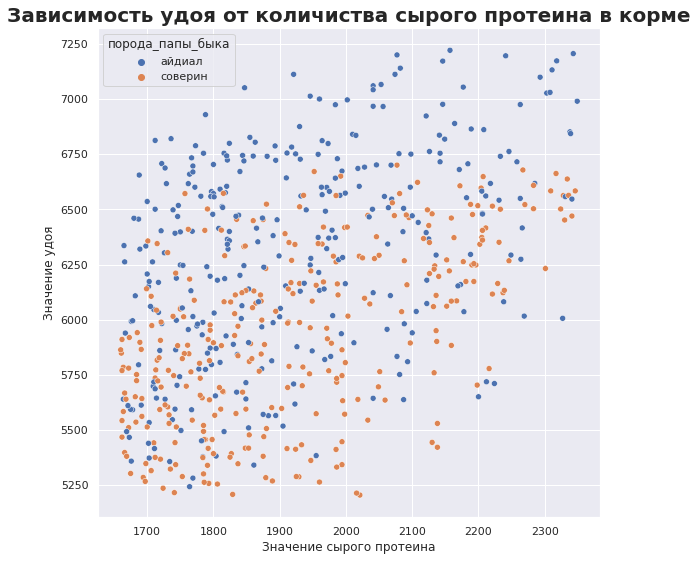

,удой_кг,сырой_протеин_г
удой_кг,1.000000,0.446731
сырой_протеин_г,0.446731,1.000000


In [80]:
scatterplot_creator(ferma_main_df, 
                    'сырой_протеин_г',
                    'удой_кг',
                    'Зависимость удоя от количиства сырого протеина в корме',
                    'Значение сырого протеина',
                    'Значение удоя',
                    'порода_папы_быка'
                   )

Коровы папы которой был породы айдиал дают немного больше молока чем коровы папа которых был породы соверин.

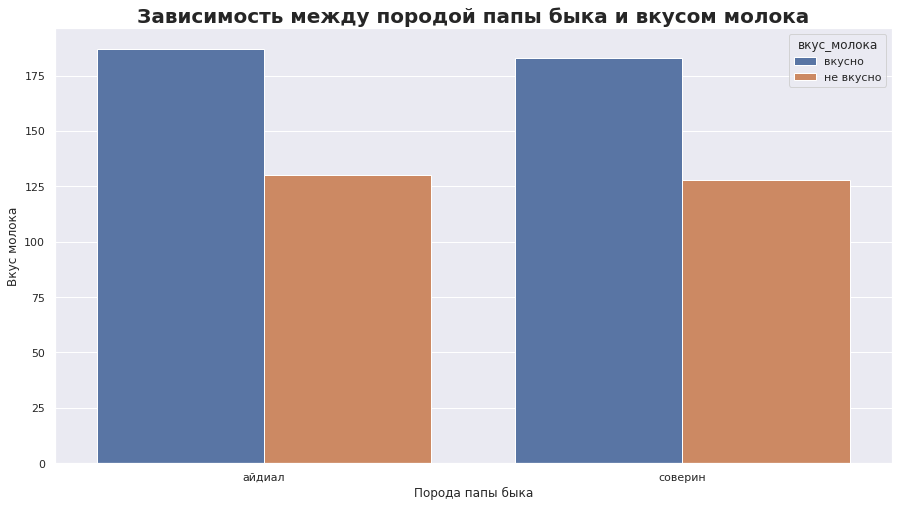

/opt/conda/lib/python3.9/site-packages/scipy/stats/_stats_py.py:110: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  warnings.warn("The input array could not be properly "


SpearmanrResult(correlation=0.001504985498162926, pvalue=0.9699749450409079)

KendalltauResult(correlation=0.0015049854981629255, pvalue=0.9699390041682674)

In [81]:
countplot_creator(ferma_main_df,
                  'порода_папы_быка',
                  'вкус_молока',
                  'Зависимость между породой папы быка и вкусом молока',
                  'Порода папы быка',
                  'Вкус молока'
                 )

Для фермера нет никакой разницы какой породы был папа бык, ему одинаково нравится молоко коров папой которых был бык породы айдиал и соверин.

### Вывод по корреляционному анализу.

Мы изучили как целевые признаки зависят от входных, вои краткие результаты исслеодования:

- лучше всего линейная зависимость просматривается между удоем и значением ЭКЕ. Фермеру чаще нравилось молоко, которое было получено после скормки корма с ЭКЕ равным примерно примерно 15, так же заметна тенденция того, что чем меньше ЭКЕ содержится в корме, тем менее вероятно такое молоко понравится фермеру.

- Между удоем и значением содержания сырого протеина в корме почти нет никакой корреляции. Никакой особой зависимости между вкусом молока и содержанием сырого протеина в корме нет.

- На графике зависимости удоя от сахаро-протеинового отношения трудно разглядеть линейную зависимость, но коэффициент корреляции говорит о том, что она есть и она достатончо большая. Mожно сказать, что фермеру чуть больше нравится молоко, которое было получено от коров, которые ели корм с немного большим CПО.

- Порода коровы никак не влияет на ее удой. Для всех пород он примерно одинаков.

- Коровы которые пасутся на холмистых пастбищах в основном дают немного больше молока в год, чем те коровы, что пасутся на равнинах. С большей вероятностью фермеру понравится молоко коровы, которая пасласть в холмистой местности.

- По полученным данным видно, что возраст сильно влияет на то, сколько молока может дать корова в год. Молодые коровы (коровы, которые младше двух лет) дают меньше молока чем взрослые особи. Молодая корова дает примерно **5500 кг** молока в год, а взрослая **6500 кг**.

- Можно разглядеть некоторую линейную зависимость между удоем и жирностью молока. Большинство коров дает молоко высокой жирности, начиная от **3.5%**. Вкус фермера не привязан к жирности молока.

- Между удоем молока и количиством белка в нем нет линейной зависимости. можно сказать, что в основном коровы дают молоко со средним показателем белка. Фермеру немного больше нравится молоко с большим содержаением белка, но это разница слишком несущественна, чтобы говорить о какой либо зависимости.

- Порода папы быка влияет на удой. Коровы папы которых были породы айдиал дают немного больше чем коровы папами которых являются быки породы соверин. Порода папы быка не влияет на вкус молока.

- Мультиколленеарность в данных отсутствует, входные признаки не сильно коррелируют друг между другом.

## Создание и обучение моделей линейной регресси

### Модель 1

In [82]:
ferma_main_df.head()

,id,удой_кг,энергетическая_кормовая_единица,сырой_протеин_г,cахаро_протеиновое_соотношение,порода,тип_пастбища,порода_папы_быка,жирность_%,белок_%,вкус_молока,возраст
0,1,5863,14.2,1743,0.890,вис бик айдиал,равнинное,айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,вис бик айдиал,равнинное,соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,рефлешнсоверинг,холмистое,соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,рефлешнсоверинг,холмистое,айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,вис бик айдиал,равнинное,соверин,3.73,3.073,вкусно,менее_2_лет


Необходимо определить какие признаки мы возьмем для нашей модели. Стоит учесть, что ключевым признаком является **удой_кг**.

Явно необходимо взять все признаки связанные с кормом коровы так как они имеют большое влияние на удой коровы. Информацию про породу коровы так же учтем, потосу что она может достаточно точно быть описана линейно. Информацию о типе пастбища считаю нужным учесть. Так же важным параметром является возраст коровы, его мы тоже оставим. Так же порода папы быка тоже является важной характеристикой. Жирность и процент белка логически брать не стоит, но она подтверждает удой и дает дополнительное поле для рассчетов весов модели, что в теории должно увеличить ее точность (я проверил, так и происходит).

In [83]:
RANDOM_STATE = 42
X_1 = ferma_main_df[['энергетическая_кормовая_единица',
                   'сырой_протеин_г',
                   'cахаро_протеиновое_соотношение',
                   'возраст',
                   'порода_папы_быка',  
                   'тип_пастбища',
                   'порода'
                  ]]
Y_1 = ferma_main_df[['удой_кг']]

In [84]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(
    X_1,
    Y_1,
    random_state=RANDOM_STATE
)
X_train_1.head()

,энергетическая_кормовая_единица,сырой_протеин_г,cахаро_протеиновое_соотношение,возраст,порода_папы_быка,тип_пастбища,порода
508,16.5,2123,0.94,более_2_лет,соверин,холмистое,рефлешнсоверинг
383,12.5,1889,0.89,менее_2_лет,соверин,холмистое,рефлешнсоверинг
587,14.7,1671,0.88,более_2_лет,айдиал,равнинное,вис бик айдиал
197,14.4,2063,0.94,более_2_лет,айдиал,холмистое,вис бик айдиал
328,13.1,2077,0.89,более_2_лет,айдиал,равнинное,вис бик айдиал


Необходимо масштабировать количественные признаки и закодировать категориальные.

In [85]:
num_col_names_1 = ['энергетическая_кормовая_единица',
                 'сырой_протеин_г',
                 'cахаро_протеиновое_соотношение' 
                ]
scaler_1 = StandardScaler()
X_train_scaled_1 = scaler_1.fit_transform(X_train_1[num_col_names_1])
X_test_scaled_1 = scaler_1.transform(X_test_1[num_col_names_1])


In [86]:
cat_col_names_1 = ['тип_пастбища', 'возраст', 'порода_папы_быка', 'порода']
encoder_1 = OneHotEncoder(drop='first', sparse=False)
encoder_1.fit(X_train_1[cat_col_names_1])
X_train_ohe_1 = encoder_1.transform(X_train_1[cat_col_names_1])
X_test_ohe_1 = encoder_1.transform(X_test_1[cat_col_names_1])
encoder_col_names_1 = encoder_1.get_feature_names()

In [87]:
X_train_ohe_1 = pd.DataFrame(X_train_ohe_1, columns=encoder_col_names_1)
X_test_ohe_1 = pd.DataFrame(X_test_ohe_1, columns=encoder_col_names_1)

X_train_scaled_1 = pd.DataFrame(X_train_scaled_1, columns=num_col_names_1)
X_test_scaled_1 = pd.DataFrame(X_test_scaled_1, columns=num_col_names_1)

X_train_1 = pd.concat([X_train_ohe_1, X_train_scaled_1], axis=1)
X_test_1 = pd.concat([X_test_ohe_1, X_test_scaled_1], axis=1)

X_train_1.head()

,x0_холмистое,x1_менее_2_лет,x2_соверин,x3_рефлешнсоверинг,энергетическая_кормовая_единица,сырой_протеин_г,cахаро_протеиновое_соотношение
0,1.0,0.0,1.0,1.0,1.502378,1.079523,0.837130
1,1.0,1.0,1.0,1.0,-1.557270,-0.196920,-0.703661
2,0.0,0.0,0.0,0.0,0.125536,-1.386085,-1.011818
3,1.0,0.0,0.0,0.0,-0.103937,0.752230,0.837130
4,0.0,0.0,0.0,0.0,-1.098323,0.828598,-0.703661


Теперь можно обучать и проверять работу модели

In [88]:
model_lr_1 = LinearRegression()
model_lr_1.fit(X_train_1, y_train_1)
predictions_1 = model_lr_1.predict(X_test_1)
predictions_1[:5]

array([[6031.53800915],
       [6433.102365  ],
       [5459.59979845],
       [5655.81590336],
       [5978.90877426]])

In [89]:
r2_1 = r2_score(y_test_1, predictions_1)
r2_1

0.784407840058695

Исследование коэфициента детерминации показало неплохой результат, но нужно рассмотреть распределение остатков. 

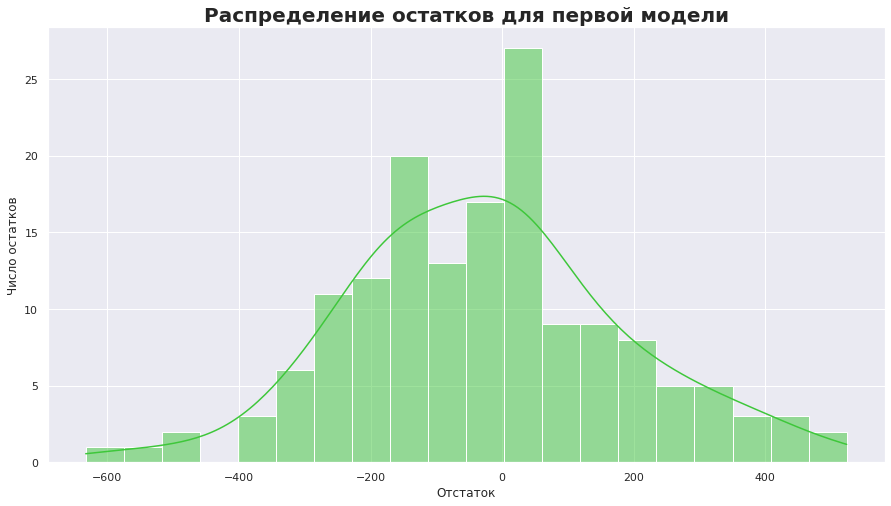

count    157.000000
mean     -25.373279
std      208.615453
min     -632.814226
25%     -164.146020
50%      -34.294547
75%      108.696551
max      523.551579
Name: удой_кг, dtype: float64

In [90]:
residuals_1 = y_test_1 - predictions_1
histogram_creator(df=residuals_1,
                 parametr='удой_кг',
                 bins=20,
                 title='Распределение остатков для первой модели',
                 xlabel='Отстаток',
                 ylabel='Число остатков'
                )


График похож на нормальное распределение с выбросами. С левой стороны есть выбросы на **600 кг** молока. То есть модель предсказала, что корова даст на **600 кг** молока в год больше, чем на самом деле.

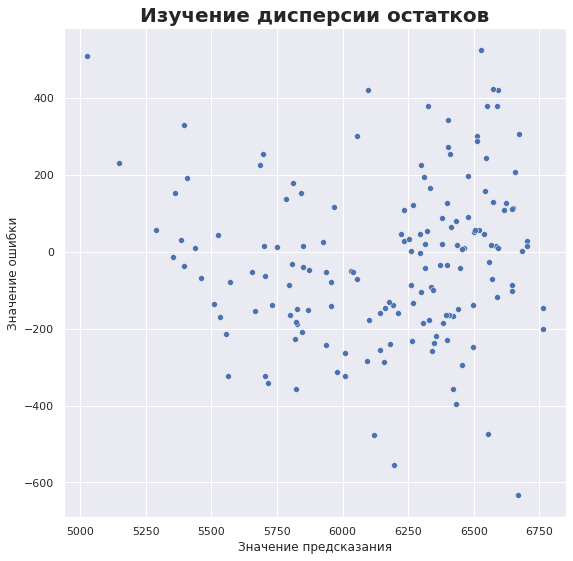

,errors,predictions
errors,1.000000,0.056378
predictions,0.056378,1.000000


In [91]:
predictions_1 = pd.DataFrame(predictions_1)
residuals_1.reset_index(drop=True, inplace=True)
df_for_scatterplot_1 = pd.concat([predictions_1, residuals_1], axis=1)
df_for_scatterplot_1.rename(
    columns={
        0 : 'predictions',
        'удой_кг' : 'errors'
    },
    inplace=True
)

scatterplot_creator(df_for_scatterplot_1, 
                    'predictions',
                    'errors',
                    'Изучение дисперсии остатков',
                    'Значение предсказания',
                    'Значение ошибки'
                   )

При исслдовании дисперсии остатков выяснилось, что у модели непостоянный разброс. Это говорит о посредственном качестве ее предсказаний - модель может быть непредсказуема и давать непредвиденный результат. От такого свойства дисперсии необходимо избавляться. Хорошим показательем является то, что у дисперсии нет корреляции.

In [92]:
model_lr_1.intercept_, model_lr_1.coef_

(array([6262.3967992]),
 array([[  50.99203737, -237.10120726, -240.31695476,   -1.00690249,
          156.86348137,   50.6013418 ,  162.47804469]]))

#### Вывод по работе модели 1

Модель номер 1 показала неплохой результат работы, коэффициент детерминации равный **0.784**, говорит о том, что данные не сильно варируются относительно средних значений. Гистограмма распределения остатков похожа на нормальное распределение, только со смещением влево и выбросами с левой стороны. Самым критичным недостатком первой модели является распределение остатков. Анализ дисперсии показал, что у модели она не постаянна - это значит, что модель может быть непредсказуемой и это необходимо исправлять.

### Модель 2

Непостоянство дисперсии прошлой модели может быть вызвано неправильным представлением параметров входящих парамтров. Необходимо изучить подозрительные параметры. Под подозрительными подразумевается СПО, так как на графике тяжело разглядеть линейную зависимость и ЭКЕ.

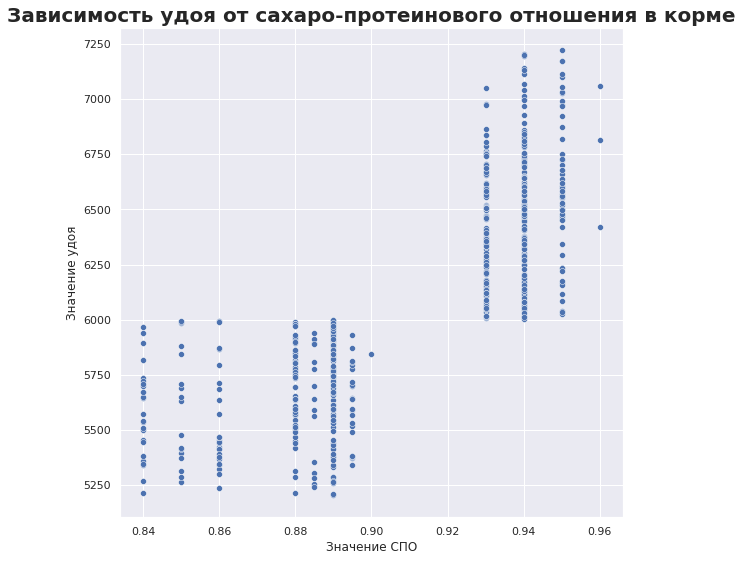

,удой_кг,cахаро_протеиновое_соотношение
удой_кг,1.000000,0.806339
cахаро_протеиновое_соотношение,0.806339,1.000000


In [93]:
scatterplot_creator(ferma_main_df, 
                    'cахаро_протеиновое_соотношение',
                    'удой_кг',
                    'Зависимость удоя от сахаро-протеинового отношения в корме',
                    'Значение СПО',
                    'Значение удоя'
                   )

Можно разбить значение СПО на два кластера. Переходным значением будем считать значение СПО равное **0.91**. Разобьем это значение на два категориальных столбца.

In [94]:
ferma_main_df['сахаро_протеиновое_соотношение_категория'] = (
    pd.cut(ferma_main_df['cахаро_протеиновое_соотношение'],
           bins=[-np.inf, 0.91, np.inf],
           labels=[0, 1]
          )
)
ferma_main_df

,id,удой_кг,энергетическая_кормовая_единица,сырой_протеин_г,cахаро_протеиновое_соотношение,порода,тип_пастбища,порода_папы_быка,жирность_%,белок_%,вкус_молока,возраст,сахаро_протеиновое_соотношение_категория
0,1,5863,14.200000,1743,0.890,вис бик айдиал,равнинное,айдиал,3.58,3.076,вкусно,более_2_лет,0
1,2,5529,12.800000,2138,0.890,вис бик айдиал,равнинное,соверин,3.54,3.079,вкусно,менее_2_лет,0
2,3,5810,14.000000,1854,0.885,рефлешнсоверинг,холмистое,соверин,3.59,3.074,не вкусно,более_2_лет,0
3,4,5895,12.400000,2012,0.885,рефлешнсоверинг,холмистое,айдиал,3.40,3.075,не вкусно,более_2_лет,0
4,5,5302,12.800000,1675,0.885,вис бик айдиал,равнинное,соверин,3.73,3.073,вкусно,менее_2_лет,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
624,625,6812,15.400000,1964,0.940,рефлешнсоверинг,равнинное,айдиал,3.74,3.075,не вкусно,более_2_лет,1
625,626,5513,12.900000,1700,0.880,рефлешнсоверинг,равнинное,соверин,3.64,3.073,вкусно,менее_2_лет,0
626,627,5970,14.400000,1837,0.880,рефлешнсоверинг,холмистое,соверин,3.64,3.075,не вкусно,более_2_лет,0
627,628,5746,13.800000,1994,0.890,рефлешнсоверинг,равнинное,соверин,3.64,3.077,вкусно,более_2_лет,0


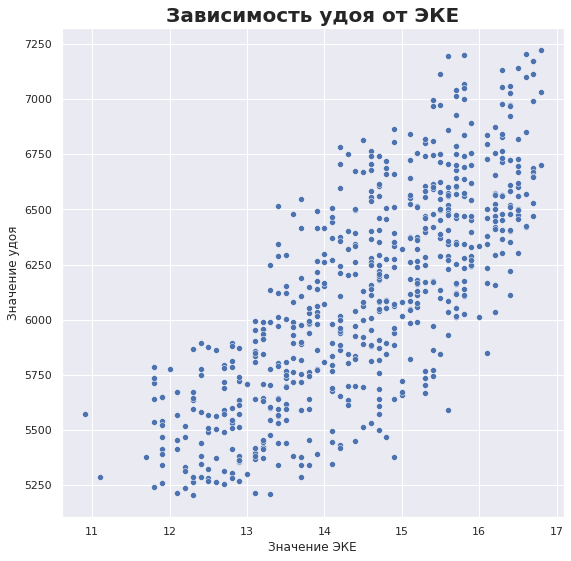

,удой_кг,энергетическая_кормовая_единица
удой_кг,1.000000,0.765098
энергетическая_кормовая_единица,0.765098,1.000000


In [95]:
scatterplot_creator(ferma_main_df, 
                    'энергетическая_кормовая_единица',
                    'удой_кг',
                    'Зависимость удоя от ЭКЕ',
                    'Значение ЭКЕ',
                    'Значение удоя'
                   )

Чтобы сделать зависимость линейной необходимо добавить столбец с ЭКЕ в квадрате.

ps. вопрос к ревьеру


Как это вообще влияет на зависимость, ведь график распределения не измняется от слова совсем?

In [96]:
ferma_main_df['энергетическая_кормовая_единица_квадрат'] = (
    ferma_main_df['энергетическая_кормовая_единица'] ** 2
)

In [97]:
ferma_main_df

,id,удой_кг,энергетическая_кормовая_единица,сырой_протеин_г,cахаро_протеиновое_соотношение,порода,тип_пастбища,порода_папы_быка,жирность_%,белок_%,вкус_молока,возраст,сахаро_протеиновое_соотношение_категория,энергетическая_кормовая_единица_квадрат
0,1,5863,14.200000,1743,0.890,вис бик айдиал,равнинное,айдиал,3.58,3.076,вкусно,более_2_лет,0,201.639999
1,2,5529,12.800000,2138,0.890,вис бик айдиал,равнинное,соверин,3.54,3.079,вкусно,менее_2_лет,0,163.840012
2,3,5810,14.000000,1854,0.885,рефлешнсоверинг,холмистое,соверин,3.59,3.074,не вкусно,более_2_лет,0,196.000000
3,4,5895,12.400000,2012,0.885,рефлешнсоверинг,холмистое,айдиал,3.40,3.075,не вкусно,более_2_лет,0,153.759995
4,5,5302,12.800000,1675,0.885,вис бик айдиал,равнинное,соверин,3.73,3.073,вкусно,менее_2_лет,0,163.840012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
624,625,6812,15.400000,1964,0.940,рефлешнсоверинг,равнинное,айдиал,3.74,3.075,не вкусно,более_2_лет,1,237.159988
625,626,5513,12.900000,1700,0.880,рефлешнсоверинг,равнинное,соверин,3.64,3.073,вкусно,менее_2_лет,0,166.409988
626,627,5970,14.400000,1837,0.880,рефлешнсоверинг,холмистое,соверин,3.64,3.075,не вкусно,более_2_лет,0,207.359985
627,628,5746,13.800000,1994,0.890,рефлешнсоверинг,равнинное,соверин,3.64,3.077,вкусно,более_2_лет,0,190.440002


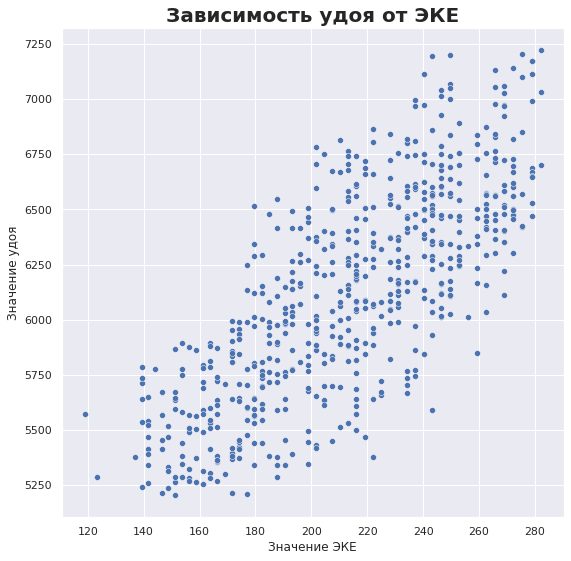

,удой_кг,энергетическая_кормовая_единица_квадрат
удой_кг,1.00000,0.76553
энергетическая_кормовая_единица_квадрат,0.76553,1.00000


In [98]:
scatterplot_creator(ferma_main_df, 
                    'энергетическая_кормовая_единица_квадрат',
                    'удой_кг',
                    'Зависимость удоя от ЭКЕ',
                    'Значение ЭКЕ',
                    'Значение удоя'
                   )


Теперь можно переходить к подготовке данных и созданию модели

In [99]:
ferma_main_df.head()

,id,удой_кг,энергетическая_кормовая_единица,сырой_протеин_г,cахаро_протеиновое_соотношение,порода,тип_пастбища,порода_папы_быка,жирность_%,белок_%,вкус_молока,возраст,сахаро_протеиновое_соотношение_категория,энергетическая_кормовая_единица_квадрат
0,1,5863,14.2,1743,0.890,вис бик айдиал,равнинное,айдиал,3.58,3.076,вкусно,более_2_лет,0,201.639999
1,2,5529,12.8,2138,0.890,вис бик айдиал,равнинное,соверин,3.54,3.079,вкусно,менее_2_лет,0,163.840012
2,3,5810,14.0,1854,0.885,рефлешнсоверинг,холмистое,соверин,3.59,3.074,не вкусно,более_2_лет,0,196.000000
3,4,5895,12.4,2012,0.885,рефлешнсоверинг,холмистое,айдиал,3.40,3.075,не вкусно,более_2_лет,0,153.759995
4,5,5302,12.8,1675,0.885,вис бик айдиал,равнинное,соверин,3.73,3.073,вкусно,менее_2_лет,0,163.840012


In [100]:
X_2 = ferma_main_df.drop(['удой_кг', 'вкус_молока'], axis=1)

Y_2 = ferma_main_df[['удой_кг']]

In [101]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(
    X_2,
    Y_2,
    random_state=RANDOM_STATE
)
X_train_2.head()

,id,энергетическая_кормовая_единица,сырой_протеин_г,cахаро_протеиновое_соотношение,порода,тип_пастбища,порода_папы_быка,жирность_%,белок_%,возраст,сахаро_протеиновое_соотношение_категория,энергетическая_кормовая_единица_квадрат
508,509,16.5,2123,0.94,рефлешнсоверинг,холмистое,соверин,3.70,3.074,более_2_лет,1,272.250000
383,384,12.5,1889,0.89,рефлешнсоверинг,холмистое,соверин,3.34,3.072,менее_2_лет,0,156.250000
587,588,14.7,1671,0.88,вис бик айдиал,равнинное,айдиал,3.18,3.079,более_2_лет,0,216.089996
197,198,14.4,2063,0.94,вис бик айдиал,холмистое,айдиал,3.62,3.079,более_2_лет,1,207.359985
328,329,13.1,2077,0.89,вис бик айдиал,равнинное,айдиал,3.64,3.076,более_2_лет,0,171.610016


Отлично, мы подготовили тренировочные и тестовые выборки, теперь можно закодировать категориальные признаки и масштабировать количественные.

In [102]:
num_col_names_2 = [
    'энергетическая_кормовая_единица_квадрат',
    'сырой_протеин_г'
]
scaler_2 = StandardScaler()
X_train_scaled_2 = scaler_2.fit_transform(X_train_2[num_col_names_2])
X_test_scaled_2 = scaler_2.transform(X_test_2[num_col_names_2])

In [103]:
cat_col_names_2 = ['возраст', 'порода_папы_быка', 'тип_пастбища', 'порода']
encoder_2 = OneHotEncoder(drop='first', sparse=False)
encoder_2.fit(X_train_2[cat_col_names_2])
X_train_ohe_2 = encoder_2.transform(X_train_2[cat_col_names_2])
X_test_ohe_2 = encoder_2.transform(X_test_2[cat_col_names_2])
encoder_col_names_2 = encoder_2.get_feature_names()

X_train_ohe_2 = pd.DataFrame(X_train_ohe_2, columns=encoder_col_names_2)
X_test_ohe_2 = pd.DataFrame(X_test_ohe_2, columns=encoder_col_names_2)

X_train_scaled_2 = pd.DataFrame(X_train_scaled_2, columns=num_col_names_2)
X_test_scaled_2 = pd.DataFrame(X_test_scaled_2, columns=num_col_names_2)

X_train_2 = pd.concat([X_train_ohe_2,
                     X_train_scaled_2,
                     X_train_2['сахаро_протеиновое_соотношение_категория'].reset_index(drop=True)],
                     axis=1
                   )
X_test_2 = pd.concat([X_test_ohe_2,
                    X_test_scaled_2, 
                    X_test_2['сахаро_протеиновое_соотношение_категория'].reset_index(drop=True)],
                    axis=1
                  )
X_train_2

,x0_менее_2_лет,x1_соверин,x2_холмистое,x3_рефлешнсоверинг,энергетическая_кормовая_единица_квадрат,сырой_протеин_г,сахаро_протеиновое_соотношение_категория
0,0.0,1.0,1.0,1.0,1.577968,1.079523,1
1,1.0,1.0,1.0,1.0,-1.511438,-0.196920,0
2,0.0,0.0,0.0,0.0,0.082269,-1.386085,0
3,0.0,0.0,1.0,0.0,-0.150235,0.752230,1
4,0.0,0.0,0.0,0.0,-1.102357,0.828598,0
...,...,...,...,...,...,...,...
466,0.0,0.0,1.0,1.0,-0.674103,1.565008,0
467,0.0,0.0,0.0,0.0,0.239935,-0.998788,1
468,0.0,0.0,0.0,1.0,-0.890627,-0.818777,0
469,0.0,0.0,0.0,0.0,-1.102357,0.130373,0


Теперь данные полностью готовы для обучения и проверки нашей второй модели.

In [104]:
model_lr_2 = LinearRegression()
model_lr_2.fit(X_train_2, y_train_2)
predictions_2 = model_lr_2.predict(X_test_2)
predictions_2[:5]

array([[5944.27811587],
       [6466.65563156],
       [5518.9371906 ],
       [5621.10309085],
       [5871.19777011]])

Теперь необходимо оценить качество работы модели.

In [105]:
r2_2 = r2_score(y_test_2, predictions_2)
r2_2

0.8180879809119024

Резкльтат работы совсем немного лучше чем у прошлой модели, он равен **0.818**, а у прошлой модели коэффициент детерминации равнялся **0.788**. Нужно посмотреть, что скажут нам график распределения остатков и график разброса дисперсии.

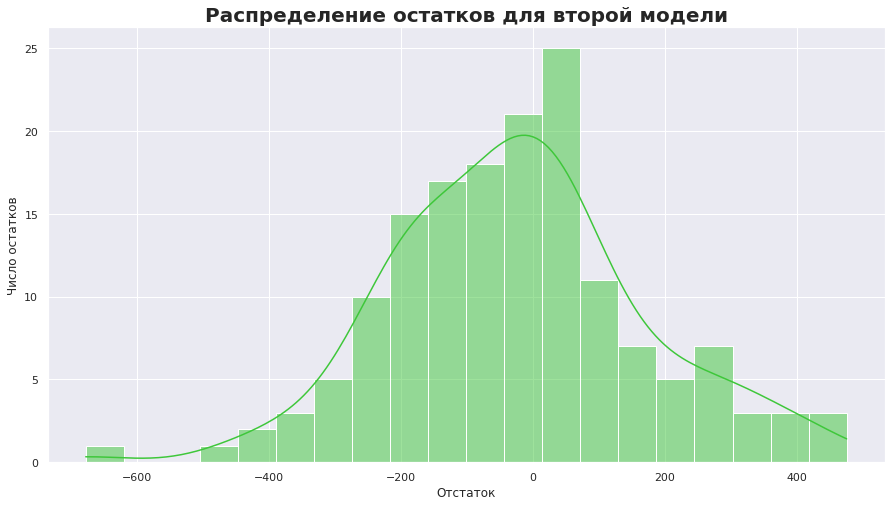

count    157.000000
mean     -24.372793
std      191.495301
min     -677.412027
25%     -147.957613
50%      -27.871263
75%       60.192044
max      475.458319
Name: удой_кг, dtype: float64

In [106]:
residuals_2 = y_test_2 - predictions_2
histogram_creator(df=residuals_2,
                 parametr='удой_кг',
                 bins=20,
                 title='Распределение остатков для второй модели',
                 xlabel='Отстаток',
                 ylabel='Число остатков'
                )


Распределение остатков второй модели тоже похож на нормальное распределение со смещением и выбрасами с левой стороны. Модели все еще может сделать слишком большое предсказание обманув тем самым фермера. Точнее рассмотреть это можно при помощи графика разброса дисперсии.

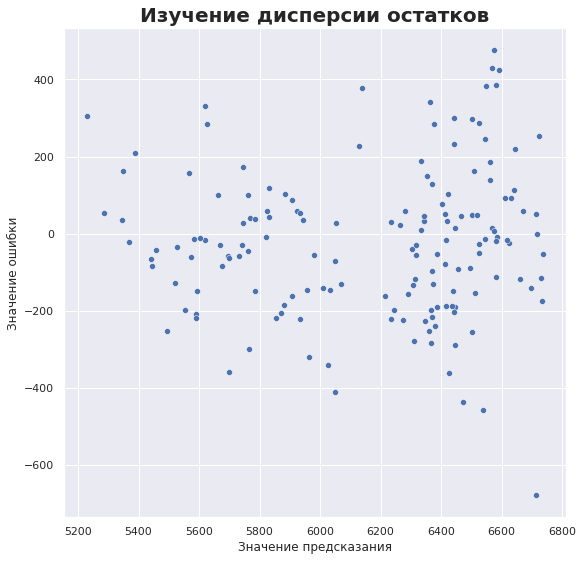

,errors,predictions
errors,1.000000,0.041217
predictions,0.041217,1.000000


In [107]:
predictions_2 = pd.DataFrame(predictions_2)
residuals_2.reset_index(drop=True, inplace=True)
df_for_scatterplot_2 = pd.concat([predictions_2, residuals_2], axis=1)
df_for_scatterplot_2.rename(
    columns={
        0 : 'predictions',
        'удой_кг' : 'errors'
    },
    inplace=True
)

scatterplot_creator(df_for_scatterplot_2, 
                    'predictions',
                    'errors',
                    'Изучение дисперсии остатков',
                    'Значение предсказания',
                    'Значение ошибки'
                   )

Разброс дисперсии у этой модели, как мне кажется, не сильно отличается от прошлой. Ошибки стали чуть более кучными - это хорошо. Но появился некоторый разрыв между предсказаниями в примерно **6100** и **6200** - это плохо, значит модель не может предсказать эти значения без ошибки.

In [108]:
model_lr_2.intercept_, model_lr_2.coef_

(array([6032.86637456]),
 array([[-224.70940435, -211.46307547,   32.6378561 ,    4.39943031,
          154.17990786,   49.13121991,  377.12043526]]))

#### Вывод по работе модели 2

Вторая модель показала хороший результат при исследовании коэфициента детерминации, он равен **0.819**. Распределение остатков этой модели стало видимо лучше, больше значений теперь сосредоточены возле нуля. Дисперия остатков остальсь примерно такой же, за исключением того, что больше ошибок стало сосредоточено возле нуля и появился разрыв между предсказаниями модели от **6100** до **6200**, модель почему-то плохо предсказывает эти значения.

### Модель 3

Необходимо добавить признак имя папы.

In [109]:
ferma_main_df = ferma_main_df.merge(ferma_dad_df, how='left')

Теперь нужно создать выборки.

In [110]:
X_3 = ferma_main_df[['энергетическая_кормовая_единица_квадрат',
                   'сырой_протеин_г',
                   'сахаро_протеиновое_соотношение_категория',
                   'возраст',
                   'порода_папы_быка',  
                   'тип_пастбища',
                   'порода',
                   'имя_папы' 
                  ]]

y_3 = ferma_main_df[['удой_кг']]

In [111]:
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(
    X_3,
    y_3,
    random_state=RANDOM_STATE
)
X_train_3.head()

,энергетическая_кормовая_единица_квадрат,сырой_протеин_г,сахаро_протеиновое_соотношение_категория,возраст,порода_папы_быка,тип_пастбища,порода,имя_папы
507,272.250000,2123,1,более_2_лет,соверин,холмистое,рефлешнсоверинг,соловчик
382,156.250000,1889,0,менее_2_лет,соверин,холмистое,рефлешнсоверинг,барин
586,216.089996,1671,0,более_2_лет,айдиал,равнинное,вис бик айдиал,буйный
196,207.359985,2063,1,более_2_лет,айдиал,холмистое,вис бик айдиал,буйный
327,171.610016,2077,0,более_2_лет,айдиал,равнинное,вис бик айдиал,геркулес


Теперь необходимо привести категориальные значения к количественному виду и масшьтабировать количественные значения. 

In [112]:
num_col_names_3 = [
    'энергетическая_кормовая_единица_квадрат',
    'сырой_протеин_г'
]
scaler_3 = StandardScaler()
X_train_scaled_3 = scaler_3.fit_transform(X_train_3[num_col_names_3])
X_test_scaled_3 = scaler_3.transform(X_test_3[num_col_names_3])


In [113]:
cat_col_names_3 = ['возраст',
                   'порода_папы_быка',
                   'тип_пастбища',
                   'порода',
                   'имя_папы'
                  ]
encoder_3 = OneHotEncoder(drop='first', sparse=False)
encoder_3.fit(X_train_3[cat_col_names_3])
X_train_ohe_3 = encoder_3.transform(X_train_3[cat_col_names_3])
X_test_ohe_3 = encoder_3.transform(X_test_3[cat_col_names_3])
encoder_col_names_3 = encoder_3.get_feature_names()

X_train_ohe_3 = pd.DataFrame(X_train_ohe_3, columns=encoder_col_names_3)
X_test_ohe_3 = pd.DataFrame(X_test_ohe_3, columns=encoder_col_names_3)

X_train_scaled_3 = pd.DataFrame(X_train_scaled_3, columns=num_col_names_3)
X_test_scaled_3 = pd.DataFrame(X_test_scaled_3, columns=num_col_names_3)

X_train_3 = pd.concat([X_train_ohe_3,
                     X_train_scaled_3,
                     X_train_3['сахаро_протеиновое_соотношение_категория'].reset_index(drop=True)],
                     axis=1
                   )
X_test_3 = pd.concat([X_test_ohe_3,
                    X_test_scaled_3, 
                    X_test_3['сахаро_протеиновое_соотношение_категория'].reset_index(drop=True)],
                    axis=1
                  )
X_train_3

,x0_менее_2_лет,x1_соверин,x2_холмистое,x3_рефлешнсоверинг,x4_буйный,x4_геркулес,x4_соловчик,энергетическая_кормовая_единица_квадрат,сырой_протеин_г,сахаро_протеиновое_соотношение_категория
0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.577968,1.079523,1
1,1.0,1.0,1.0,1.0,0.0,0.0,0.0,-1.511438,-0.196920,0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.082269,-1.386085,0
3,0.0,0.0,1.0,0.0,1.0,0.0,0.0,-0.150235,0.752230,1
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.102357,0.828598,0
...,...,...,...,...,...,...,...,...,...,...
466,0.0,0.0,1.0,1.0,0.0,0.0,0.0,-0.674103,1.565008,0
467,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.239935,-0.998788,1
468,0.0,0.0,0.0,1.0,0.0,1.0,0.0,-0.890627,-0.818777,0
469,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.102357,0.130373,0


Теперь можно обучить и протестировать модель

In [114]:
model_lr_3 = LinearRegression()
model_lr_3.fit(X_train_3, y_train_3)
predictions_3 = model_lr_3.predict(X_test_3)
predictions_3[:5]

array([[6013.24839069],
       [6488.05560934],
       [5552.53579447],
       [5589.05473272],
       [5868.92903814]])

In [115]:
r2_3 = r2_score(y_test_3, predictions_3)
r2_3

0.8247542616172041

Коэффициент детерминации равный примерно **0.825** говорит о высоком качестве модели.

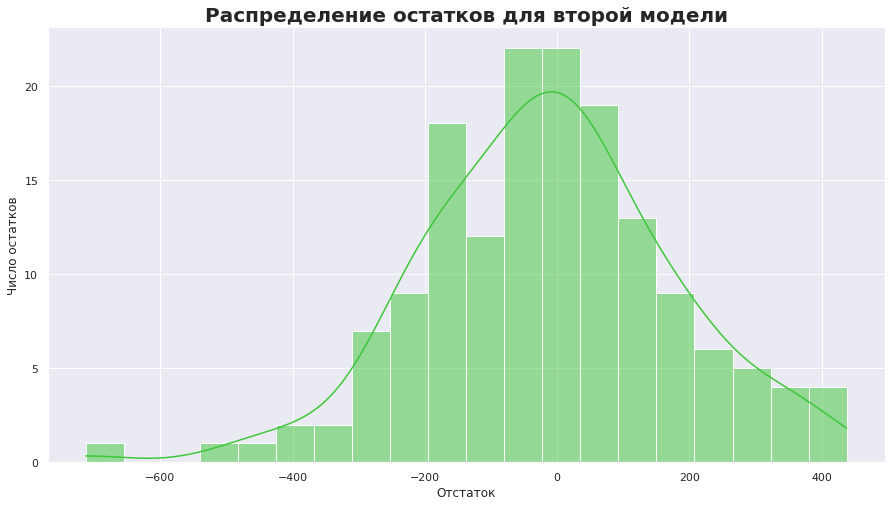

count    157.000000
mean     -15.201517
std      188.865041
min     -712.794060
25%     -144.381606
50%      -15.967697
75%      112.027159
max      437.597702
Name: удой_кг, dtype: float64

In [116]:
residuals_3 = y_test_3 - predictions_3
histogram_creator(df=residuals_3,
                 parametr='удой_кг',
                 bins=20,
                 title='Распределение остатков для второй модели',
                 xlabel='Отстаток',
                 ylabel='Число остатков'
                )


Гистограмма распределения остатков выглядит как нормальное распределение с выбросами слева. По графику видно, что модель один раз предсказала слишком большой удой.

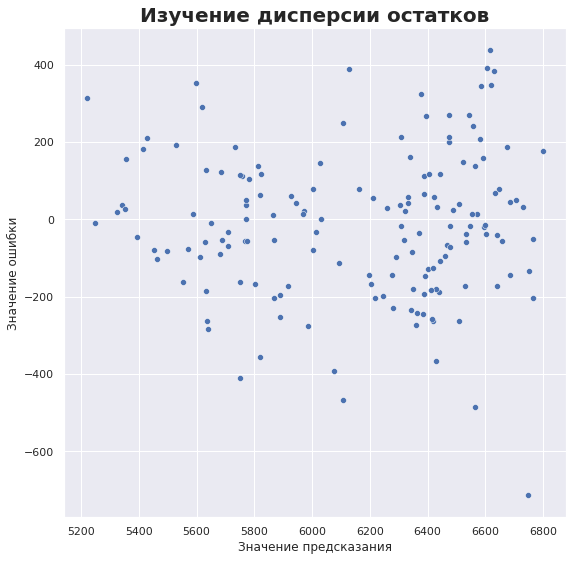

,errors,predictions
errors,1.000000,-0.005914
predictions,-0.005914,1.000000


In [117]:
predictions_3 = pd.DataFrame(predictions_3)
residuals_3.reset_index(drop=True, inplace=True)
df_for_scatterplot_3 = pd.concat([predictions_3, residuals_3], axis=1)
df_for_scatterplot_3.rename(
    columns={
        0 : 'predictions',
        'удой_кг' : 'errors'
    },
    inplace=True
)

scatterplot_creator(df_for_scatterplot_3, 
                    'predictions',
                    'errors',
                    'Изучение дисперсии остатков',
                    'Значение предсказания',
                    'Значение ошибки'
                   )

График дисперсии остатков выглядит лучше чем во всех предыдущих моделях. Данные расположены более плотно друг к другу и нет особых пробелов в графике. Так же узкие зоны более-менее скорректировалиь. Модель стала работать более предсказуемым образом.

#### Вывод по работе модели 3

Эта модель показала хорошую работу, об этом говорит как и высокое значение коэффициента детерминации, так и хорошая гистограмма остатков. Да - на ней есть выброс, но он один и он не сильно ухудшает общее качество работы модели, потому что при ценке разброса дисперсий значения распределены достаточно равномерно - это значит, что результаты выдаваемы моделью достаточно предсказуемы. 

## Cравнение моделей

### Сравнение по имеющимся показателям

- По оценке коэффициента детерминации лучше всего свою работу продемонстрировала последняя модель, ее коэффициент равен **0.825**

- По оценке гистограммы отклонений лучший результат показала модель номер три, да на ее гистограмме есть один выброс, но общая картина распределения выглядит лучге, большая часть значений сосредоточена у нуля, и у этой модли наименьшее смещение от центра, можно сказать, что его практически нет

- По оценке распределения дисперсий лучше всего себя показала третья модель. Все ошибки расположены достаточно кучно и все зоны сужения скомпенсированы. По графику этой модели видно, что сами ошибки стали меньше. Картину портит только один единственный выброс.

Резюмируая - лучшей по имеюющимся показателям является модель номер три, необходимо изучит еще несколько метрик таких как MAE, MSE и RMSE для того чтобы точно выбрать модель которой будем предсказывать значения для фермера.

In [118]:
def metric_evaluations(y_test: pd.DataFrame, predictions: np.ndarray, model_name: str) -> None:
    
    '''
    Функция принимает на вход в качетсве параметров тестовую выборку и предсказания соответсвующие
    этой тестовой выборке. Так же дополнительным параметром функция принимает название модели
    для удобного форматированного вывода результатов.
    
    По всем эти данным функция оцененивает основные метрики задачи линейной регрессии.
    '''
    
    mse = mean_squared_error(y_test, predictions)
    print(f'Значение MSE модели "{model_name}" равно {round(mse, 2)}')
    rmse = mean_squared_error(y_test, predictions, squared=False)
    print(f'Значение RMSE модели "{model_name}" равно {round(rmse, 2)}')
    mae = mean_absolute_error(y_test, predictions)
    print(f'Значение MAE модели "{model_name}" равно {round(mae, 2)}')

### Сравнение метрик моделей

In [119]:
metric_evaluations(y_test_1, predictions_1, 'первая модель')

Значение MSE модели "первая модель" равно 43887.01
Значение RMSE модели "первая модель" равно 209.49
Значение MAE модели "первая модель" равно 164.24


In [120]:
metric_evaluations(y_test_2, predictions_2, 'вторая модель')

Значение MSE модели "вторая модель" равно 37030.91
Значение RMSE модели "вторая модель" равно 192.43
Значение MAE модели "вторая модель" равно 149.04


In [121]:
metric_evaluations(y_test_3, predictions_3, 'третья модель')

Значение MSE модели "третья модель" равно 35673.89
Значение RMSE модели "третья модель" равно 188.88
Значение MAE модели "третья модель" равно 146.16


Как можено было уже сказать по графикам: самый маленький показатель среднеквадратической ошибки у модели номер три он равен **35673.89**. Соответствено самый маленький корень среднеквадратичной ошибки тоже у третьей моделм он равен **188.88**. Самое мальенькое значение средней абсолютной ошибки так же принадлежит третьей модели и оно равно **146.16**.

### Изучение доверительного интервала лучшей модели

In [122]:
print(f"Доверительный интервал для лучшей модели:\nот {round(np.quantile(predictions_3, 0.025), 2)} до {round(np.quantile(predictions_3, 0.975), 2)}")

Доверительный интервал для лучшей модели:
от 5351.32 до 6749.08


Такое значени интервала означает, что если мы будем многократно отбирать новые образцы и применять к ним наилучшую модель, то примерно в 95% случаев мы будем ожидать, что истинное значение прогнозируемой переменной отклика попадет в диапазон от **5366.25 до 6735.33**

### Вывод по работе моделей

Лучше всего себя показала последняя (третья) модель. Она обошла все модели по всем показателям:

**MSE = 35673.89**

**RMSE = 188.88**

**MAE = 146.16**

Эти значения ошибок ощутимо меньше чем у других моделей, поэтому для предсказания удоя для коров фермера будем использовать именно эту модель.

### Прогноз удоя коров 

Для начала необходимо добавить недостающие элементы в датасет cow_buy_df.

In [123]:
for column in ['cахаро_протеиновое_соотношение', 'энергетическая_кормовая_единица', 'сырой_протеин_г']:     
    cow_buy_df[column] = (
        ferma_main_df[column].mean() * 1.05
    )             
cow_buy_df.head()       

,порода,тип_пастбища,порода_папы_быка,имя_папы,текущая_жирность_%,текущий_уровень_белок_%,возраст,cахаро_протеиновое_соотношение,энергетическая_кормовая_единица,сырой_протеин_г
0,вис бик айдиал,холмистое,айдиал,геркулес,3.58,3.076,более_2_лет,0.958744,15.276163,2019.947532
1,вис бик айдиал,равнинное,соверин,буйный,3.54,3.081,менее_2_лет,0.958744,15.276163,2019.947532
2,рефлешнсоверинг,равнинное,соверин,барин,3.59,3.074,более_2_лет,0.958744,15.276163,2019.947532
3,рефлешнсоверинг,холмистое,айдиал,буйный,3.40,3.061,более_2_лет,0.958744,15.276163,2019.947532
4,рефлешнсоверинг,равнинное,айдиал,буйный,3.64,3.074,более_2_лет,0.958744,15.276163,2019.947532


Теперь необходимо подготовть датафрейм к работе с моделью. Стоит учесть, что все СПО вышло больше чем 0.91 - значит все данные принадлежат к первой категории. Нужно добавить это в датафрейм вручную. Так же нужно добавить столбец ЭКЕ в квадрате.

In [124]:
cow_buy_df['cахаро_протеиновое_соотношение_категория'] = 1
cow_buy_df['энергетическая_кормовая_единица_квадрат'] = (
    cow_buy_df['энергетическая_кормовая_единица'] ** 2
)
cow_buy_df

,порода,тип_пастбища,порода_папы_быка,имя_папы,текущая_жирность_%,текущий_уровень_белок_%,возраст,cахаро_протеиновое_соотношение,энергетическая_кормовая_единица,сырой_протеин_г,cахаро_протеиновое_соотношение_категория,энергетическая_кормовая_единица_квадрат
0,вис бик айдиал,холмистое,айдиал,геркулес,3.58,3.076,более_2_лет,0.958744,15.276163,2019.947532,1,233.361168
1,вис бик айдиал,равнинное,соверин,буйный,3.54,3.081,менее_2_лет,0.958744,15.276163,2019.947532,1,233.361168
2,рефлешнсоверинг,равнинное,соверин,барин,3.59,3.074,более_2_лет,0.958744,15.276163,2019.947532,1,233.361168
3,рефлешнсоверинг,холмистое,айдиал,буйный,3.40,3.061,более_2_лет,0.958744,15.276163,2019.947532,1,233.361168
4,рефлешнсоверинг,равнинное,айдиал,буйный,3.64,3.074,более_2_лет,0.958744,15.276163,2019.947532,1,233.361168
5,рефлешнсоверинг,равнинное,соверин,геркулес,3.63,3.053,менее_2_лет,0.958744,15.276163,2019.947532,1,233.361168
7,вис бик айдиал,равнинное,соверин,буйный,3.57,3.079,более_2_лет,0.958744,15.276163,2019.947532,1,233.361168
9,рефлешнсоверинг,холмистое,айдиал,буйный,3.40,3.079,менее_2_лет,0.958744,15.276163,2019.947532,1,233.361168
10,вис бик айдиал,холмистое,соверин,соловчик,3.73,3.055,более_2_лет,0.958744,15.276163,2019.947532,1,233.361168
11,рефлешнсоверинг,равнинное,соверин,геркулес,3.73,3.073,более_2_лет,0.958744,15.276163,2019.947532,1,233.361168


Теперь необходимо привести категориальные значения к количественному виду и масштабировать количественные значения. 

In [125]:
cow_buy_df.rename(columns={
    'текущая_жирность_%' : 'жирность_%',
    'текущий_уровень_белок_%' : 'белок_%'
    },
    inplace=True              
)

work_sample = cow_buy_df[num_col_names_3 + cat_col_names_3]

scaler_3.fit(X_3[num_col_names_3])

work_sample_scaled = scaler_3.transform(work_sample[num_col_names_3])

encoder_3.fit(X_3[cat_col_names_3])
work_sample_ohe = encoder_3.transform(work_sample[cat_col_names_3])
encoder_col_names = encoder_3.get_feature_names()

work_sample_ohe = pd.DataFrame(work_sample_ohe, columns=encoder_col_names)
work_sample_scaled = pd.DataFrame(work_sample_scaled, columns=num_col_names_3)

work_sample = pd.concat([work_sample_ohe,
                     work_sample_scaled,
                     cow_buy_df['cахаро_протеиновое_соотношение_категория'].reset_index(drop=True)],
                     axis=1
                   )

work_sample

,x0_менее_2_лет,x1_соверин,x2_холмистое,x3_рефлешнсоверинг,x4_буйный,x4_геркулес,x4_соловчик,энергетическая_кормовая_единица_квадрат,сырой_протеин_г,cахаро_протеиновое_соотношение_категория
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.534983,0.526517,1
1,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.534983,0.526517,1
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.534983,0.526517,1
3,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.534983,0.526517,1
4,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.534983,0.526517,1
5,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.534983,0.526517,1
6,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.534983,0.526517,1
7,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.534983,0.526517,1
8,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.534983,0.526517,1
9,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.534983,0.526517,1


Данные готовы к использованию модели.

In [126]:
X_3 = pd.concat([X_train_3, X_test_3])
y_3 = pd.concat([y_train_3, y_test_3])
model_lr_3.fit(X_test_3, y_test_3)
predictions = model_lr_3.predict(work_sample)
predictions

array([[6500.74133937],
       [6165.46540842],
       [6337.3126061 ],
       [6602.99143323],
       [6574.16880744],
       [6259.12374865],
       [6461.64728874],
       [6306.80955291],
       [6374.3065019 ],
       [6555.30562897],
       [6500.74133937],
       [5971.99913453],
       [6602.99143323],
       [6374.3065019 ],
       [6259.12374865],
       [6461.64728874]])

Это все прогнозные значения модели для тех коров, что фермер выбрал для покупок. Все значения похожи на правду и предсказаны без выбрасов. Нужно добавить их в датафрейм cow_buy_df.

In [127]:
cow_buy_df = cow_buy_df.reset_index(drop=True)
cow_buy_df['удой_кг'] = predictions
cow_buy_df

,порода,тип_пастбища,порода_папы_быка,имя_папы,жирность_%,белок_%,возраст,cахаро_протеиновое_соотношение,энергетическая_кормовая_единица,сырой_протеин_г,cахаро_протеиновое_соотношение_категория,энергетическая_кормовая_единица_квадрат,удой_кг
0,вис бик айдиал,холмистое,айдиал,геркулес,3.58,3.076,более_2_лет,0.958744,15.276163,2019.947532,1,233.361168,6500.741339
1,вис бик айдиал,равнинное,соверин,буйный,3.54,3.081,менее_2_лет,0.958744,15.276163,2019.947532,1,233.361168,6165.465408
2,рефлешнсоверинг,равнинное,соверин,барин,3.59,3.074,более_2_лет,0.958744,15.276163,2019.947532,1,233.361168,6337.312606
3,рефлешнсоверинг,холмистое,айдиал,буйный,3.40,3.061,более_2_лет,0.958744,15.276163,2019.947532,1,233.361168,6602.991433
4,рефлешнсоверинг,равнинное,айдиал,буйный,3.64,3.074,более_2_лет,0.958744,15.276163,2019.947532,1,233.361168,6574.168807
5,рефлешнсоверинг,равнинное,соверин,геркулес,3.63,3.053,менее_2_лет,0.958744,15.276163,2019.947532,1,233.361168,6259.123749
6,вис бик айдиал,равнинное,соверин,буйный,3.57,3.079,более_2_лет,0.958744,15.276163,2019.947532,1,233.361168,6461.647289
7,рефлешнсоверинг,холмистое,айдиал,буйный,3.40,3.079,менее_2_лет,0.958744,15.276163,2019.947532,1,233.361168,6306.809553
8,вис бик айдиал,холмистое,соверин,соловчик,3.73,3.055,более_2_лет,0.958744,15.276163,2019.947532,1,233.361168,6374.306502
9,рефлешнсоверинг,равнинное,соверин,геркулес,3.73,3.073,более_2_лет,0.958744,15.276163,2019.947532,1,233.361168,6555.305629


## Создание модели классификации

 Для создания модели логистической регресси нам необходимо провести подготовку данных - так же, как и для модели линейной регрессии. Для начала нужно привесьт датафрейм ferma_main_df к исходному виду. Нужно посмотреть, как влияет имя папы на вкус молока, может она поможет нашей модели работать более точно.

In [128]:
ferma_main_df.head()

,id,удой_кг,энергетическая_кормовая_единица,сырой_протеин_г,cахаро_протеиновое_соотношение,порода,тип_пастбища,порода_папы_быка,жирность_%,белок_%,вкус_молока,возраст,сахаро_протеиновое_соотношение_категория,энергетическая_кормовая_единица_квадрат,имя_папы
0,1,5863,14.2,1743,0.890,вис бик айдиал,равнинное,айдиал,3.58,3.076,вкусно,более_2_лет,0,201.639999,буйный
1,2,5529,12.8,2138,0.890,вис бик айдиал,равнинное,соверин,3.54,3.079,вкусно,менее_2_лет,0,163.840012,соловчик
2,3,5810,14.0,1854,0.885,рефлешнсоверинг,холмистое,соверин,3.59,3.074,не вкусно,более_2_лет,0,196.000000,барин
3,4,5895,12.4,2012,0.885,рефлешнсоверинг,холмистое,айдиал,3.40,3.075,не вкусно,более_2_лет,0,153.759995,буйный
4,5,5302,12.8,1675,0.885,вис бик айдиал,равнинное,соверин,3.73,3.073,вкусно,менее_2_лет,0,163.840012,барин


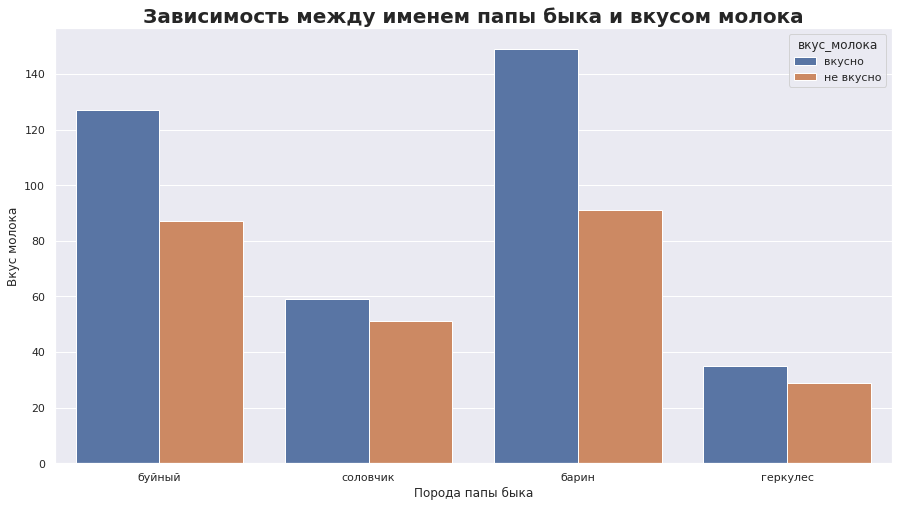

/opt/conda/lib/python3.9/site-packages/scipy/stats/_stats_py.py:110: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  warnings.warn("The input array could not be properly "


SpearmanrResult(correlation=0.06431340637489683, pvalue=0.10736606678474118)

KendalltauResult(correlation=0.05962051906793334, pvalue=0.10730932993767955)

In [129]:
countplot_creator(ferma_main_df,
                  'имя_папы',
                  'вкус_молока',
                  'Зависимость между именем папы быка и вкусом молока',
                  'Порода папы быка',
                  'Вкус молока'
                 )

Некороторая зависимость писутствует. Молоко от коров папами которых являются буйный и барин фермеру нравится чуть больше, думаю это будет полезной информацией для модели, поэтому оставим этот столбец в датафрейме. И удалим только сахаро_протеиновое_соотношение_категория и энергетическая_кормовая_единица_квадрат. Так как логистическая регрессия основана не на линейной функции.

In [130]:
ferma_main_df = ferma_main_df.drop(
    ['энергетическая_кормовая_единица_квадрат',
     'сахаро_протеиновое_соотношение_категория'],
    axis=1
)
ferma_main_df.head()

,id,удой_кг,энергетическая_кормовая_единица,сырой_протеин_г,cахаро_протеиновое_соотношение,порода,тип_пастбища,порода_папы_быка,жирность_%,белок_%,вкус_молока,возраст,имя_папы
0,1,5863,14.2,1743,0.890,вис бик айдиал,равнинное,айдиал,3.58,3.076,вкусно,более_2_лет,буйный
1,2,5529,12.8,2138,0.890,вис бик айдиал,равнинное,соверин,3.54,3.079,вкусно,менее_2_лет,соловчик
2,3,5810,14.0,1854,0.885,рефлешнсоверинг,холмистое,соверин,3.59,3.074,не вкусно,более_2_лет,барин
3,4,5895,12.4,2012,0.885,рефлешнсоверинг,холмистое,айдиал,3.40,3.075,не вкусно,более_2_лет,буйный
4,5,5302,12.8,1675,0.885,вис бик айдиал,равнинное,соверин,3.73,3.073,вкусно,менее_2_лет,барин


Теперь можно приступать к подготовке данных, точнее к разделению их на выборки и их масштабированию и приведению категориальных переменных к количественному виду.

In [131]:
ferma_main_df['вкус_молока_num'] = ferma_main_df['вкус_молока'].apply(lambda x: 1 if x=='вкусно' else 0)


numeric_cols = list(ferma_main_df.select_dtypes(exclude='object').columns)

numeric_cols.remove('id')
numeric_cols.remove('удой_кг')
numeric_cols.remove('вкус_молока_num')
print(numeric_cols)
cat_cols = list(ferma_main_df.select_dtypes(include='object').columns)
cat_cols.remove('вкус_молока')
print(cat_cols)
X = ferma_main_df[numeric_cols+cat_cols]
y = ferma_main_df['вкус_молока_num']

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2, 
    random_state=RANDOM_STATE #RANDOM_STATE берется из прошлой модели и равен 42 - не вижу смысла инициализировать 
                              #его дважды  
)
X_train

['энергетическая_кормовая_единица', 'сырой_протеин_г', 'cахаро_протеиновое_соотношение', 'жирность_%', 'белок_%']
['порода', 'тип_пастбища', 'порода_папы_быка', 'возраст', 'имя_папы']


,энергетическая_кормовая_единица,сырой_протеин_г,cахаро_протеиновое_соотношение,жирность_%,белок_%,порода,тип_пастбища,порода_папы_быка,возраст,имя_папы
332,13.800000,1692,0.880,3.65,3.071,рефлешнсоверинг,равнинное,соверин,более_2_лет,барин
6,13.200000,1792,0.885,3.48,3.077,вис бик айдиал,равнинное,соверин,более_2_лет,соловчик
104,15.500000,1958,0.950,3.71,3.073,вис бик айдиал,холмистое,айдиал,более_2_лет,буйный
114,16.200001,1818,0.930,3.70,3.073,вис бик айдиал,равнинное,айдиал,более_2_лет,буйный
482,15.300000,2205,0.940,3.72,3.071,рефлешнсоверинг,равнинное,айдиал,более_2_лет,буйный
...,...,...,...,...,...,...,...,...,...,...
71,13.700000,2212,0.895,3.61,3.077,рефлешнсоверинг,холмистое,айдиал,более_2_лет,барин
106,14.900000,1742,0.930,3.72,3.073,вис бик айдиал,равнинное,айдиал,более_2_лет,геркулес
270,13.400000,1775,0.880,3.63,3.071,рефлешнсоверинг,равнинное,айдиал,более_2_лет,геркулес
435,13.100000,1949,0.880,3.61,3.075,вис бик айдиал,равнинное,айдиал,более_2_лет,буйный


In [132]:
encoder = OneHotEncoder(sparse=False, drop='first')
scaler = StandardScaler()
encoder.fit(X_train[cat_cols])
scaler.fit(X_train[numeric_cols])

df_tmp_ohe = pd.DataFrame(encoder.transform(X_train[cat_cols]), columns=encoder.get_feature_names())
X_train_ohe = X_train.reset_index(drop=True)

df_tmp_sc = pd.DataFrame(scaler.transform(X_train[numeric_cols]), columns=numeric_cols)
X_train = pd.concat([df_tmp_ohe, df_tmp_sc], axis=1)


df_tmp_ohe = pd.DataFrame(encoder.transform(X_test[cat_cols]), columns=encoder.get_feature_names())
X_test_ohe = X_test.reset_index(drop=True)
df_tmp_sc = pd.DataFrame(scaler.transform(X_test[numeric_cols]), columns=numeric_cols)
X_test = pd.concat([df_tmp_ohe, df_tmp_sc], axis=1)

X_test.head()

,x0_рефлешнсоверинг,x1_холмистое,x2_соверин,x3_менее_2_лет,x4_буйный,x4_геркулес,x4_соловчик,энергетическая_кормовая_единица,сырой_протеин_г,cахаро_протеиновое_соотношение,жирность_%,белок_%
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,-0.495280,-0.819255,-1.013219,0.204153,0.116931
1,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.417262,0.018398,0.834127,0.627142,-1.041633
2,1.0,1.0,1.0,1.0,0.0,0.0,0.0,-0.495280,-0.688712,-1.629000,0.143726,0.116931
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.954290,-1.064024,-1.013219,0.083297,-0.655476
4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.575744,-1.417579,-0.705328,0.083297,0.116931


Данные полностью готовы можно обучать модель.

In [133]:
clf = LogisticRegression(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Recall:', recall_score(y_test, y_pred), '\nPrecision:',
      precision_score(y_test, y_pred),
      '\nAccuracy:', accuracy_score(y_test, y_pred)
)

Recall: 0.8082191780821918 
Precision: 0.6145833333333334 
Accuracy: 0.5952380952380952


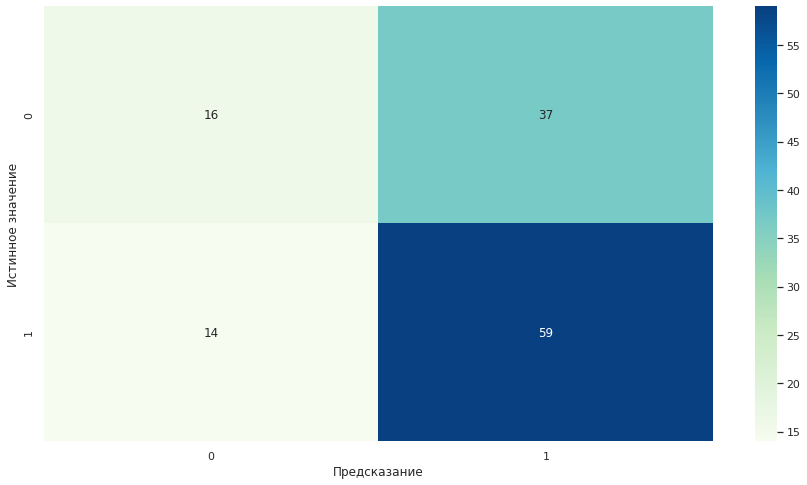

In [134]:
cm = confusion_matrix(y_test, y_pred)
sns.set()
plt.figure(figsize=(15,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='GnBu')
plt.ylabel('Истинное значение')
plt.xlabel('Предсказание'); 

Модель обучена. Изучив метрики модели можно понять, что модель достаточно точно предсказвает молоко, которое понравится фермеру она сразу верно предсказала **59** значений. Но по условию фермеру важнее всего, чтобы молоко строго соответствовало его вкусу, поэтому нельзя допускать того, чтобы модель присваивала **не вкусному** молоку класс **вкусное**, т.е нам нужно свести к нулю ошибку первого рода (свести к нулю False Positive). Для этого необходимо подобрать порог принадлежност класса при котором значение метрики **precision** будет равно **единице**, а ошибка **FP нулю**.

In [135]:
for threshold in np.arange(0, 1, 0.09):
    pred = clf.predict_proba(X_test)[:,1]>=threshold
    print(np.round(threshold,2), np.round(precision_score(y_test, pred),2))

0.0 0.58
0.09 0.58
0.18 0.58
0.27 0.59
0.36 0.59
0.45 0.63
0.54 0.64
0.63 0.71
0.72 0.8
0.81 1.0
0.9 0.0
0.99 0.0


/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Оптимальным значением порога принадлежности к классу в нашей задаче является 0.81 при нем соблюдаются все необходимае нам условия. Проверим как модель с таким пороговым значением отработет на тестовой выборке.

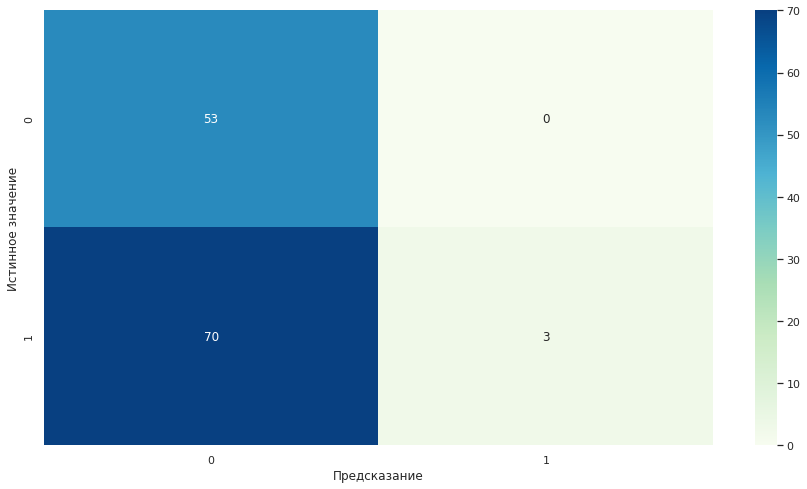

In [136]:
threshold = 0.81

probs = clf.predict_proba(X_test)
predicted_labels = (probs[:, 1] > threshold).astype(int)
predicted_labels
predicted_labels = pd.DataFrame(predicted_labels)
predicted_labels.rename(columns={
                                0 : 'предсказание'
                                },
                        inplace=True
)
cm = confusion_matrix(y_test, predicted_labels)
sns.set()
plt.figure(figsize=(15,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='GnBu')
plt.ylabel('Истинное значение')
plt.xlabel('Предсказание')
plt.show()

### Вывод по работе модели

После настройки наша модель стала работать гораздо лучше. Теперь на тестовой выборке наша модель не допустила ни одной значимой для нас ошибки. Для тестовой выборки значение метрики **percision** равно **1**. Это говорит о том, что модель предсказвает то, что молоко имеет класс 1, т.е. **вкусно** с высокой точностью.

### Предсказание вкуса молока

Необходимо подготовить датафрейм **cow_buy_df** к работе модели. Сначала приведем ее к стандартному виду, потом настроим под модель и применим ее к ним.

In [137]:
cow_buy_df = cow_buy_df.drop(['энергетическая_кормовая_единица_квадрат', 
                              'cахаро_протеиновое_соотношение_категория'
                             ],
                             axis=1)

cow_buy_df

,порода,тип_пастбища,порода_папы_быка,имя_папы,жирность_%,белок_%,возраст,cахаро_протеиновое_соотношение,энергетическая_кормовая_единица,сырой_протеин_г,удой_кг
0,вис бик айдиал,холмистое,айдиал,геркулес,3.58,3.076,более_2_лет,0.958744,15.276163,2019.947532,6500.741339
1,вис бик айдиал,равнинное,соверин,буйный,3.54,3.081,менее_2_лет,0.958744,15.276163,2019.947532,6165.465408
2,рефлешнсоверинг,равнинное,соверин,барин,3.59,3.074,более_2_лет,0.958744,15.276163,2019.947532,6337.312606
3,рефлешнсоверинг,холмистое,айдиал,буйный,3.40,3.061,более_2_лет,0.958744,15.276163,2019.947532,6602.991433
4,рефлешнсоверинг,равнинное,айдиал,буйный,3.64,3.074,более_2_лет,0.958744,15.276163,2019.947532,6574.168807
5,рефлешнсоверинг,равнинное,соверин,геркулес,3.63,3.053,менее_2_лет,0.958744,15.276163,2019.947532,6259.123749
6,вис бик айдиал,равнинное,соверин,буйный,3.57,3.079,более_2_лет,0.958744,15.276163,2019.947532,6461.647289
7,рефлешнсоверинг,холмистое,айдиал,буйный,3.40,3.079,менее_2_лет,0.958744,15.276163,2019.947532,6306.809553
8,вис бик айдиал,холмистое,соверин,соловчик,3.73,3.055,более_2_лет,0.958744,15.276163,2019.947532,6374.306502
9,рефлешнсоверинг,равнинное,соверин,геркулес,3.73,3.073,более_2_лет,0.958744,15.276163,2019.947532,6555.305629


In [138]:
work_sample = cow_buy_df[cat_cols + numeric_cols]

encoder.fit(X[cat_cols])
scaler.fit(X[numeric_cols])
 
df_tmp_ohe = pd.DataFrame(encoder.transform(X[cat_cols]), columns=encoder.get_feature_names())
df_tmp_sc = pd.DataFrame(scaler.transform(X[numeric_cols]), columns=numeric_cols)
X = pd.concat([df_tmp_ohe, df_tmp_sc], axis=1)
clf.fit(X, y)

df_tmp_ohe = pd.DataFrame(encoder.transform(work_sample[cat_cols]), columns=encoder.get_feature_names())
work_sample_ohe = work_sample.reset_index(drop=True)
df_tmp_sc = pd.DataFrame(scaler.transform(work_sample[numeric_cols]), columns=numeric_cols)
work_sample = pd.concat([df_tmp_ohe, df_tmp_sc], axis=1)
work_sample


,x0_рефлешнсоверинг,x1_холмистое,x2_соверин,x3_менее_2_лет,x4_буйный,x4_геркулес,x4_соловчик,энергетическая_кормовая_единица,сырой_протеин_г,cахаро_протеиновое_соотношение,жирность_%,белок_%
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.559249,0.526517,1.418034,-0.144486,0.129303
1,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.559249,0.526517,1.418034,-0.382639,2.090802
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.559249,0.526517,1.418034,-0.084947,-0.655315
3,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.559249,0.526517,1.418034,-1.216176,-5.755005
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.559249,0.526517,1.418034,0.212746,-0.655315
5,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.559249,0.526517,1.418034,0.153208,-8.893384
6,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.559249,0.526517,1.418034,-0.204024,1.306184
7,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.559249,0.526517,1.418034,-1.216176,1.306184
8,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.559249,0.526517,1.418034,0.748592,-8.108766
9,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.559249,0.526517,1.418034,0.748592,-1.047577


Датафрейм полностью готов к работе модели. Можно запускать ее, главное не забыть указать выведенное значение принадлежности к классу.

In [139]:
threshold = 0.81

worc_probs = clf.predict_proba(work_sample)
predicted_labels = (worc_probs[:, 1] > threshold).astype(int)
predicted_labels
predicted_labels = pd.DataFrame(predicted_labels)
predicted_labels.rename(columns={
                                0 : 'предсказание'
                                },
                        inplace=True
)
predicted_labels.loc[predicted_labels['предсказание'] == 0] = 'не вкусно'
predicted_labels.loc[predicted_labels['предсказание'] == 1] = 'вкусно'
predicted_labels

,предсказание
0,не вкусно
1,не вкусно
2,не вкусно
3,не вкусно
4,не вкусно
5,не вкусно
6,не вкусно
7,вкусно
8,не вкусно
9,не вкусно


In [140]:
cow_buy_df['вкус_молока'] = predicted_labels
cow_buy_df

,порода,тип_пастбища,порода_папы_быка,имя_папы,жирность_%,белок_%,возраст,cахаро_протеиновое_соотношение,энергетическая_кормовая_единица,сырой_протеин_г,удой_кг,вкус_молока
0,вис бик айдиал,холмистое,айдиал,геркулес,3.58,3.076,более_2_лет,0.958744,15.276163,2019.947532,6500.741339,не вкусно
1,вис бик айдиал,равнинное,соверин,буйный,3.54,3.081,менее_2_лет,0.958744,15.276163,2019.947532,6165.465408,не вкусно
2,рефлешнсоверинг,равнинное,соверин,барин,3.59,3.074,более_2_лет,0.958744,15.276163,2019.947532,6337.312606,не вкусно
3,рефлешнсоверинг,холмистое,айдиал,буйный,3.40,3.061,более_2_лет,0.958744,15.276163,2019.947532,6602.991433,не вкусно
4,рефлешнсоверинг,равнинное,айдиал,буйный,3.64,3.074,более_2_лет,0.958744,15.276163,2019.947532,6574.168807,не вкусно
5,рефлешнсоверинг,равнинное,соверин,геркулес,3.63,3.053,менее_2_лет,0.958744,15.276163,2019.947532,6259.123749,не вкусно
6,вис бик айдиал,равнинное,соверин,буйный,3.57,3.079,более_2_лет,0.958744,15.276163,2019.947532,6461.647289,не вкусно
7,рефлешнсоверинг,холмистое,айдиал,буйный,3.40,3.079,менее_2_лет,0.958744,15.276163,2019.947532,6306.809553,вкусно
8,вис бик айдиал,холмистое,соверин,соловчик,3.73,3.055,более_2_лет,0.958744,15.276163,2019.947532,6374.306502,не вкусно
9,рефлешнсоверинг,равнинное,соверин,геркулес,3.73,3.073,более_2_лет,0.958744,15.276163,2019.947532,6555.305629,не вкусно


Модель утверждает, что всего две коровы из датафрейма cow_buy_df дают вкусное молоко, за то мы можем быть практически полностью уверены, что обе эти коровы и вправду будет давать молоко вкус которого будет нравитсья фермеру и соответствовать его строгим критериям.

# Итоговые выводы

## Вывод по предсказаниям, советы фермеру

Полностью датафрейм с коровами которых присмотрел фермер выглядит так

In [141]:
cow_buy_df

,порода,тип_пастбища,порода_папы_быка,имя_папы,жирность_%,белок_%,возраст,cахаро_протеиновое_соотношение,энергетическая_кормовая_единица,сырой_протеин_г,удой_кг,вкус_молока
0,вис бик айдиал,холмистое,айдиал,геркулес,3.58,3.076,более_2_лет,0.958744,15.276163,2019.947532,6500.741339,не вкусно
1,вис бик айдиал,равнинное,соверин,буйный,3.54,3.081,менее_2_лет,0.958744,15.276163,2019.947532,6165.465408,не вкусно
2,рефлешнсоверинг,равнинное,соверин,барин,3.59,3.074,более_2_лет,0.958744,15.276163,2019.947532,6337.312606,не вкусно
3,рефлешнсоверинг,холмистое,айдиал,буйный,3.40,3.061,более_2_лет,0.958744,15.276163,2019.947532,6602.991433,не вкусно
4,рефлешнсоверинг,равнинное,айдиал,буйный,3.64,3.074,более_2_лет,0.958744,15.276163,2019.947532,6574.168807,не вкусно
5,рефлешнсоверинг,равнинное,соверин,геркулес,3.63,3.053,менее_2_лет,0.958744,15.276163,2019.947532,6259.123749,не вкусно
6,вис бик айдиал,равнинное,соверин,буйный,3.57,3.079,более_2_лет,0.958744,15.276163,2019.947532,6461.647289,не вкусно
7,рефлешнсоверинг,холмистое,айдиал,буйный,3.40,3.079,менее_2_лет,0.958744,15.276163,2019.947532,6306.809553,вкусно
8,вис бик айдиал,холмистое,соверин,соловчик,3.73,3.055,более_2_лет,0.958744,15.276163,2019.947532,6374.306502,не вкусно
9,рефлешнсоверинг,равнинное,соверин,геркулес,3.73,3.073,более_2_лет,0.958744,15.276163,2019.947532,6555.305629,не вкусно


Необходимо посмотреть какие коровы по нашим предсказаниям приносят больше **6000 кг** молока в год и их молоко понравилось бы фермеру

In [142]:
cow_buy_df[(cow_buy_df['удой_кг'] >= 6000) & (cow_buy_df['вкус_молока'] == 'вкусно')]

,порода,тип_пастбища,порода_папы_быка,имя_папы,жирность_%,белок_%,возраст,cахаро_протеиновое_соотношение,энергетическая_кормовая_единица,сырой_протеин_г,удой_кг,вкус_молока
7,рефлешнсоверинг,холмистое,айдиал,буйный,3.4,3.079,менее_2_лет,0.958744,15.276163,2019.947532,6306.809553,вкусно


Точным требованиям соответствует только одна корова породы РефлешнсСоверинг. По прогнозам она должна принести примерно **6271 кг** молока в год и ее молоко должно нравится фермеру. Но если осмотреть датафрейм внимательно можно заметить, что вторая корова молоко которой тоже понравилась фермеру по мнению модели даст удой примерно **5984 кг**. Учитывая доверительный интервал (от 5366.25 до 6735.33) нашей модели и то, что все-таки это модель я бы не стал исключать эту корову из списка лучших для покупки.

По моему мнению фемрер может приобрести без рисков для себя две коровы с такими даннымы:

In [143]:
cow_buy_df.loc[[7, 11]]

,порода,тип_пастбища,порода_папы_быка,имя_папы,жирность_%,белок_%,возраст,cахаро_протеиновое_соотношение,энергетическая_кормовая_единица,сырой_протеин_г,удой_кг,вкус_молока
7,рефлешнсоверинг,холмистое,айдиал,буйный,3.40,3.079,менее_2_лет,0.958744,15.276163,2019.947532,6306.809553,вкусно
11,вис бик айдиал,холмистое,соверин,барин,3.42,3.075,менее_2_лет,0.958744,15.276163,2019.947532,5971.999135,вкусно


Так же, я бы предложил фермеру не полениться и попробовать молоко тех коров которых он планирует купить, потому что если удой математически предсказать примерно возможно, то вкус молока предсказать реально, но это будет достаточно не точная характеристика т.к. модель позволяет лишь почти не сомневаться в том, что молоко этих двух коров на самом деле вкусное, но это не говорит, что с вероятностью 100% молоко остальных коров не вкусное. Так у фермера сформируется более полная картина и он сможет подобрать коров почти безошибочно и с минимальным риском для его бизнеса. Еще одним советом по выбору коровы является то, что фермеру стоит присмотреть корову старше двух лет, так как ее удой скорее всего будет больше чем у кровы, которая младше двух лет. Так же больший удой показывали коровы пасуться на холмистой местности.


Так же совет можно дать небольшие советы по уходу за коровами для фемра основываясь на корреляционном анализе:
- Сильнее всего на удой коровы влияет ЭКЕ в корме, чем оно больше - тем больше удой
- Коровы которые ели корм с СПО больше 0.92 давали больше молока



## Выводы о моделях линейно и логистической регресси

***Какие способы улучшения качества регрессионной модели вы использовали в этой задаче?***

Модели доведены до максимально качественных показателей.

Для улучшения работы модели линейной регресси неленейная зависимость между параметрами и целевым признаком была сведена к линейной настолько насколько это возможно. Один из параметров был переведен из количественного вида в категориальный так, как зависимость между ним и целевым признаком была очевидно линейна, но значения были разбиты по группам и из-за этого результат работы модели получался менее точный. Так же был добавлен признак(параметр) из другого датафрейма - он тоже повысил точность работы модели.

Для повышения точности работы модели логистической регрессии так же использовался дополнительный столбец из другого датафрейма, который повысил точность работы модели. В предсказаниях модели лгрега нам было важно получить значения молока которые точно понравиться фермеру, если говорить более научно, нам было необходимо свести к минимуму ошибку первого рода. Для этого подбиралось пороговое значени принадлежности значения к классу. В данной модели самое эффективное значени порога равно 0.81 при нем ошибка первого рода минимальна.

***Возможно ли ещё улучшить результаты регрессионной модели? Если можно, то как? Если нет, то почему?***

Улучшить полученные модели вряд-ли представляется возможным, но впринципе это рельно, так как модель можно настроить изменяя ее гиперпараметры и, так же одним из вариантов улучшения точности работы модели является обучение ее на выборке большего размера - чем больше выборка (состоящая из качественных данных) тем более точная получится модель.

***Какие метрики моделей классификации, в том числе логистической регрессии, важны при анализе рисков или экономических расчётов?***

В работе модели логрега важны все метрики. Accuracy помогает определить общую точность модели, она поможет в начале работы с моделью и поможет понять в ту ли сторону вообще двигается разработчик. А при анализе рисков в бизнесе или экономических расчетаз важны метрики recall и precision, а вот какая из них это уже задачка на подумать. Необходимо отталкиваться от задачи которую нужно решить, и от того какого рода (первого/второго) ошибку нужно уменьшить и какая из них приведет к большим убыткам.

## Общий вывод по проделанной работе

В данном прокте была проекте была проделана большая работа по предобработке и исследованию данных. Так же было пройдено много шагов для создания моделей линейной и логистической регрессии, которые будут давать достаточно точные пердсказания. Резюмируя:

***Предобработка данных***
- Заменены имена столбцов.
- Значения в столбцах приведены к общему виду.
- Удалены явные и неявные дубликаты.
- проверены аномальные значения.
- на этапе пердобработки в датафрейме ***ferma_main_df*** потеряно ***менее 1%*** данных, а в датафрейме ***cow_buy_df*** почти ***20%***, но это все дубликаты.

***Исследовательский анализ данных***
- Удалены выбросы.
- Созадны функции для удобного исследования данных различных типов.
- ЭКЕ распределено нормально. Среднее значение равно 14.54, медианное 14.7 - маленький разброс говорит о том, что в данных нет выбросов.
- Среднее значение сырого протеина в граммах равно 1923.36, медианное 1888 - неольшой разброс говорит о том, что в данных нет выбросов. Чаще всего встерчаюся корма примерно с 1700 г и 1800 г протеина.
- Стандартное отклонение СПО очень маленькое, размах данных тоже. Среднее значение равно **0.913**, медианное **0.93**.
- Большинство коров пасутся на равнинах, но фермер при выборе отобрал равное количиство и тех и других.
- ***Вис Бик Айдиал*** является более популярной породой чем ***РефлешнСоверинг***. Фермер отобрал равное количиство коров обеих пород.
- Большинство коров старге двух лет.
- Фермер предпочитат молоко с жирностью не меньше чем **3.34%** и не жирнее чем **3.77%**
- Фермер предпочитает молоко со средним содержание белка, т.е. со значением примерно равным **3.06**.
- Среднее значение равно **6125.97 кг**, медианное **6132.5 кг**. Максимальный удой за год составил **7222 кг**, а минимальный **5204**. Чаще всего встречаются коровы удой который находится в диапазоне от **6550 кг** до **6600 кг**. Пришлось удалить один огромный выброс.
- Фермеру нравится большая часть молока, которое он пробовал.

***Корреляционный анализ***
- Созданы функции для исследования зависимости между данными различных типов и с "разных сторон".
- лучше всего линейная зависимость просматривается между удоем и значением ЭКЕ. Фермеру чаще нравилось молоко, которое было получено после скормки корма с ЭКЕ равным примерно примерно 15, так же заметна тенденция того, что чем меньше ЭКЕ содержится в корме, тем менее вероятно такое молоко понравится фермеру.
- Между удоем и значением содержания сырого протеина в корме почти нет никакой корреляции. Никакой особой зависимости между вкусом молока и содержанием сырого протеина в корме нет.
- На графике зависимости удоя от сахаро-протеинового отношения трудно разглядеть линейную зависимость, но коэффициент корреляции говорит о том, что она есть и она достатончо большая. Mожно сказать, что фермеру чуть больше нравится молоко, которое было получено от коров, которые ели корм с немного большим CПО.
- Порода коровы никак не влияет на ее удой. Для всех пород он примерно одинаков.
- Коровы которые пасутся на холмистых пастбищах в основном дают немного больше молока в год, чем те коровы, что пасутся на равнинах. С большей вероятностью фермеру понравится молоко коровы, которая пасласть в холмистой местности.
- По полученным данным видно, что возраст сильно влияет на то, сколько молока может дать корова в год. Молодые коровы (коровы, которые младше двух лет) дают меньше молока чем взрослые особи. Молодая корова дает примерно **5500 кг** молока в год, а взрослая **6500 кг**.
- Можно разглядеть некоторую линейную зависимость между удоем и жирностью молока. Большинство коров дает молоко высокой жирности, начиная от **3.5%**. Вкус фермера не привязан к жирности молока.
- Между удоем молока и количиством белка в нем нет линейной зависимости. можно сказать, что в основном коровы дают молоко со средним показателем белка. Фермеру немного больше нравится молоко с большим содержаением белка, но это разница слишком несущественна, чтобы говорить о какой либо зависимости.
- Порода папы быка влияет на удой. Коровы папы которых были породы айдиал дают немного больше чем коровы папами которых являются быки породы соверин. Порода папы быка не влияет на вкус молока.
- Мультиколленеарность в данных отсутствует, входные признаки не сильно коррелируют друг между другом.

***Создание моделей линейной регрессии***
- Были подготовлены данные - количественные данные масштабированы, категориальные приведены к количественному виду при помощи One Hot Encoder.
- Были обучены три модели и изучены влияния входных признаков на качество рвботы модели.
- Были изучены основные метрики модели линейной регрессии (MSE, RMSE, MAE). Распределене из остатков и дисперсий.
- По изученным результатам метрик была выбрана лучшая модель которая использовалась для предсказания данных по неизвестному для нее датафрейму.

***Создание модели классификации***
- Были подготовлены данные - количественные данный масштабированы, категориальные приведены к количественному виду при помощи One Hot Encoder.
- Была определена самая значимая для нашего исследования ошибка - это ошибка первого рода.
- Были изучены метрики модели.
- Ошибка первого рода была сведена к нулю, метрика percision сведена к единице.
- Модель была использована для предсказания вкуса молока на не известном для модели датафрейме.